# Проект: Обучение с учителем: качество модели

# **Описание проекта**


Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

# **Цель**

Разработать решение, которое позволит интернет-магазину «В один клик» персонализировать предложения для постоянных клиентов и увеличить их покупательскую активность.

# **Задачи**


## Классификация покупателей по уровню финансовой активности

* Проанализировать данные о покупках и разделить клиентов на две группы:
 + «Снизилась»: если клиент стал покупать меньше товаров.
 + «Прежний уровень»: если уровень покупательской активности остался прежним.

## Сбор и группировка данных о клиентах

* Коммуникация с клиентом: информация о взаимодействии клиента с сотрудниками компании (звонки, письма, обращения в поддержку).
* Продуктовое поведение: данные о том, какие товары покупает клиент, как часто, на какую сумму и т. д.
* Покупательское поведение: информация о покупках клиента в целом: сколько всего потратил, как часто оформляет заказы, использует ли скидки и промокоды.
* Поведение на сайте: данные о том, как клиент ведет себя на сайте: сколько времени проводит, сколько страниц просматривает, какие товары ищет.

## Визуализация данных

* Использовать диаграмму Исикавы (рыбья кость) для наглядного представления групп признаков и их влияния на целевой признак (уровень покупательской активности).
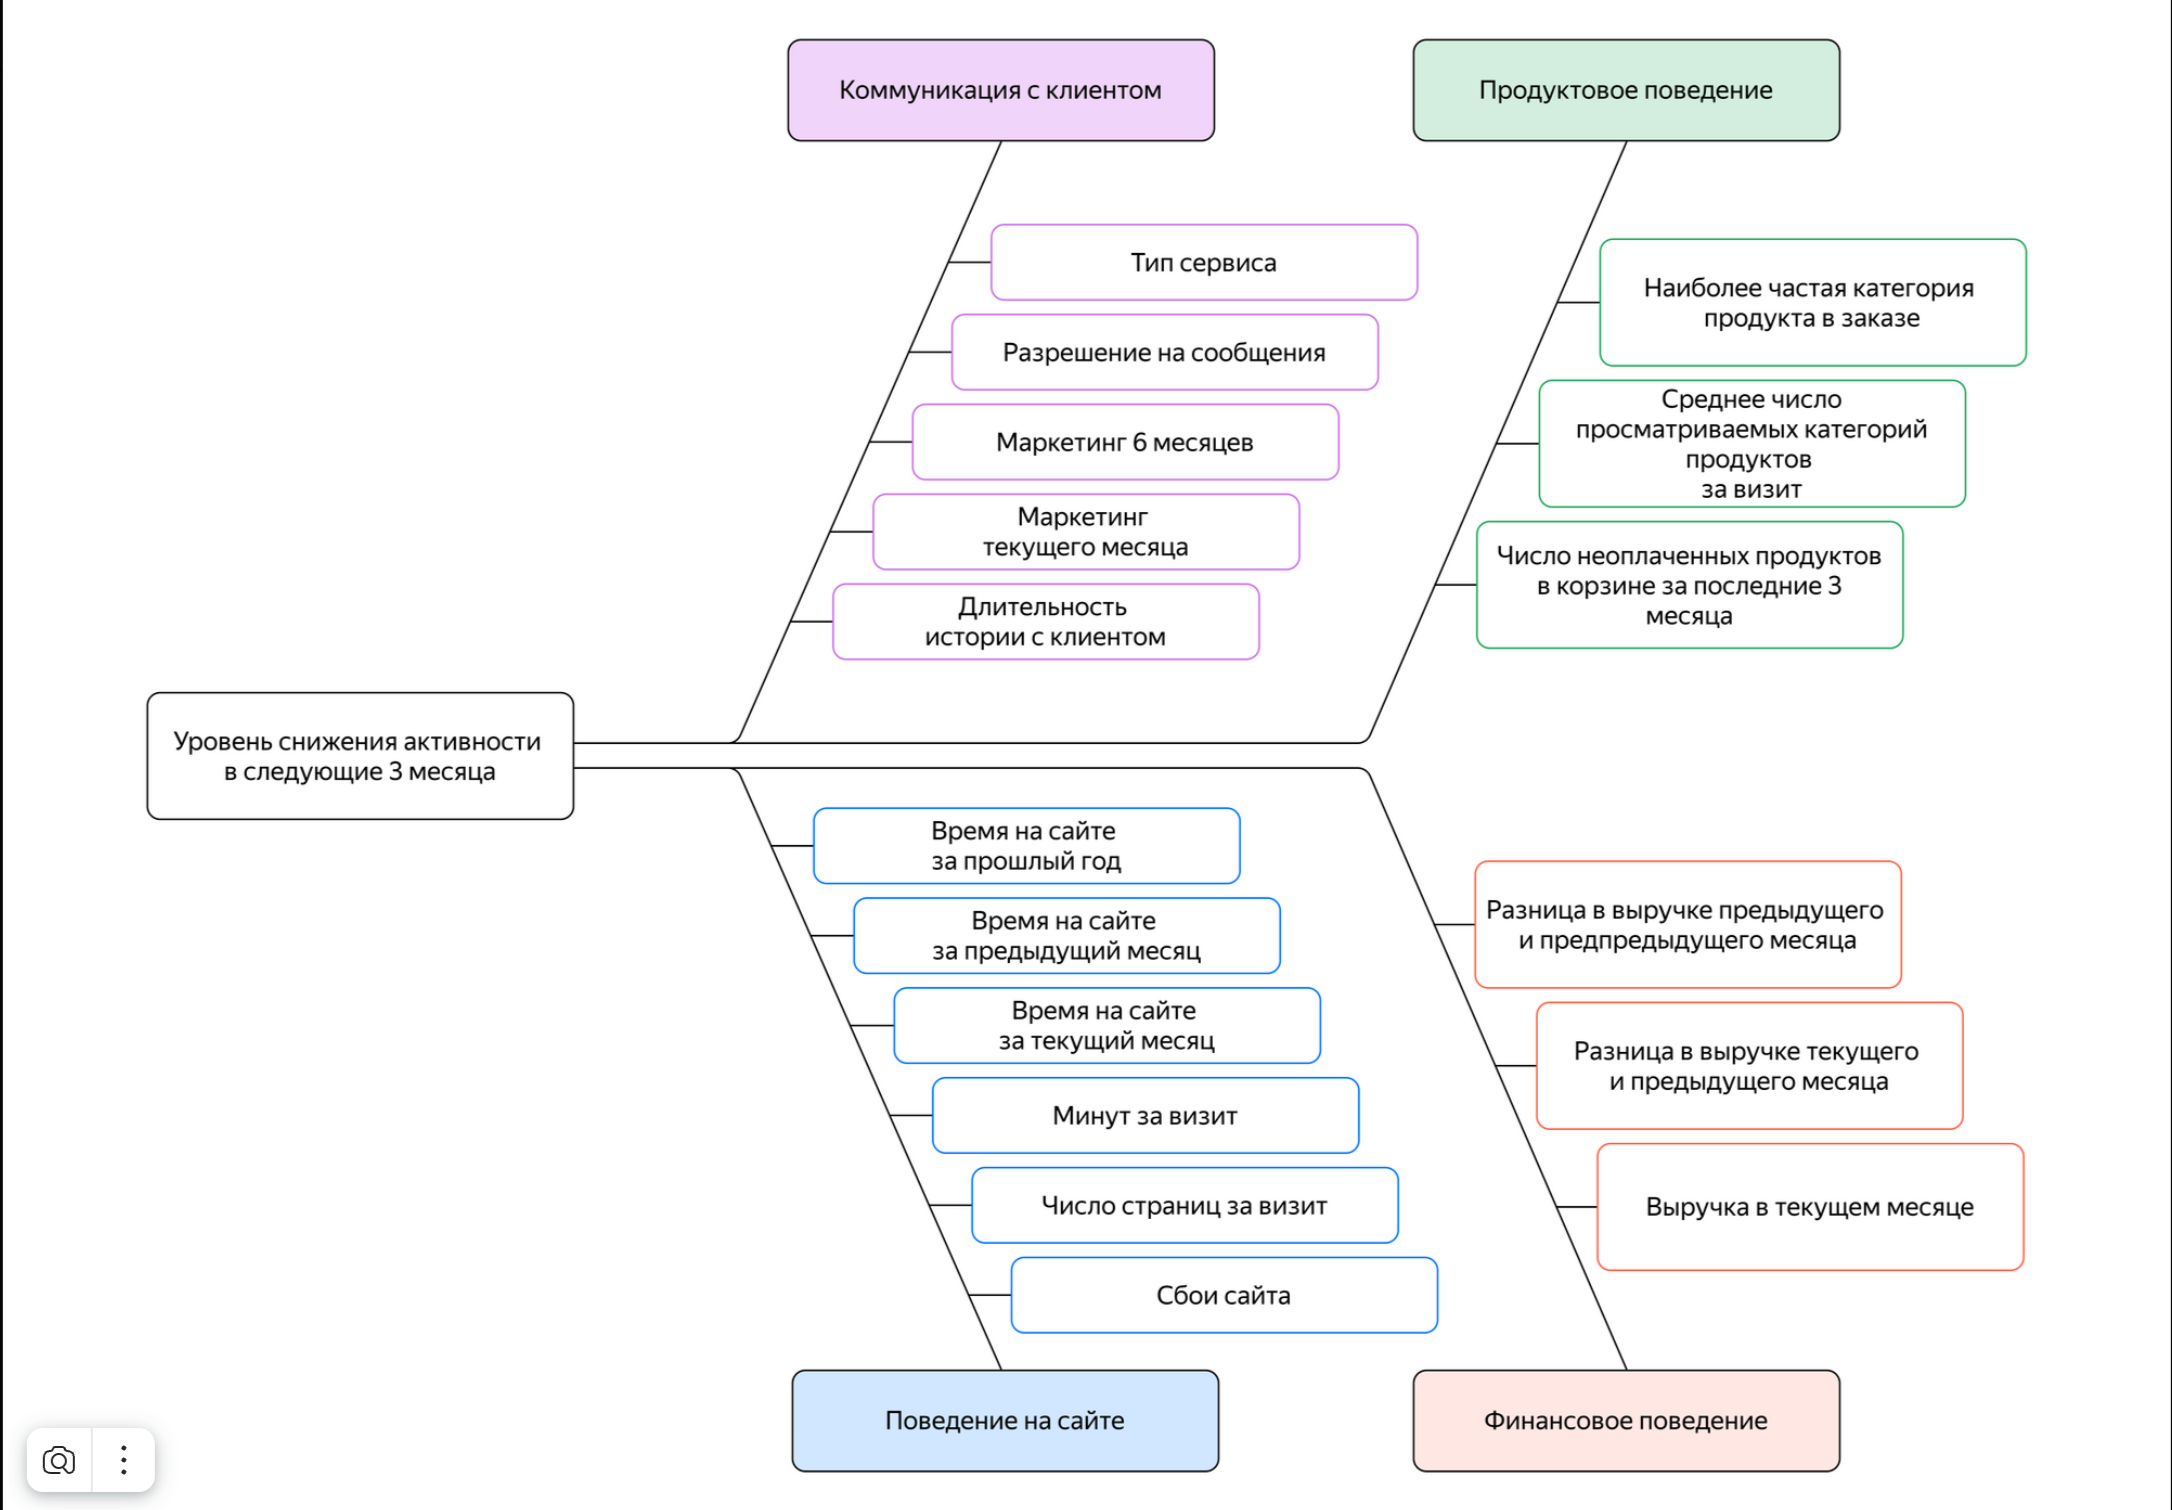

## Построение прогнозной модели

* Разработать модель машинного обучения, которая будет предсказывать вероятность снижения покупательской активности клиента в следующие три месяца на основе собранных данных.

## Включение данных о прибыльности

* Обогатить данные информацией о прибыльности каждого клиента за последние три месяца, полученной от финансового департамента.

## Сегментация клиентов и разработка рекомендаций

* Используя прогнозы модели и данные о прибыльности, разделить клиентов на сегменты.
* Разработать персонализированные предложения для каждого сегмента, направленные на увеличение их покупательской активности.





# Описание данных



**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

| Column Name | Description |
| --- | --- |
| id | Номер покупателя в корпоративной базе данных |
| Покупательская активность | Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень» |
| Тип сервиса | Уровень сервиса, например «премиум» и «стандарт» |
| Разрешить сообщать | Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель |
| Маркет_актив_6_мес | Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев |
| Маркет_актив_тек_мес | Количество маркетинговых коммуникаций в текущем месяце |
| Длительность | Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте |
| Акционные_покупки | Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев |
| Популярная_категория | Самая популярная категория товаров у покупателя за последние 6 месяцев |
| Средний_просмотр_категорий_за_визит | Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца |
| Неоплаченные_продукты_штук_квартал | Общее число неоплаченных товаров в корзине за последние 3 месяца |
| Ошибка_сервиса | Число сбоев, которые коснулись покупателя во время посещения сайта |
| Страниц_за_визит | Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца |

**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

| Column Name | Description |
| --- | --- |
| id | Номер покупателя в корпоративной базе данных |
| Период | Название периода, во время которого зафиксирована выручка |
| Выручка | Сумма выручки за период |

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

| Column Name | Description |
| --- | --- |
| id | Номер покупателя в корпоративной базе данных |
| Период | Название периода, во время которого зафиксировано общее время |
| минут | Значение времени, проведённого на сайте, в минутах |

**money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

| Column Name | Description |
| --- | --- |
| id | Номер покупателя в корпоративной базе данных |
| Прибыль | Значение прибыли |


# Загрузка данных

In [1]:
!pip -q install scikit-learn==1.1.3
!pip -q install --upgrade shap

!pip -q install phik
!pip -q install matplotlib==3.4.3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import phik
import shap

In [3]:
# оставим коды создания функций под импортами, чтобы удобнее было их контролировать

In [4]:
def analyze(df, name):
    """
    Функция для анализа датафрейма
    :param df: датафрейм для анализа
    :param name: имя датафрейма
    """
    print(f"\nАнализ DataFrame: {name}\n")
    
    # 1. Общая информация о DataFrame
    print("Общая информация:")
    display(df.head())
    display(df.info())

    # 2. Описательная статистика
    print("Описательная статистика:")
    display(df.describe(include='all'))

    # 3. Анализ по каждому столбцу
    for col in df.columns:
        print('-' * 30)
        print(f"Анализ столбца: {col}")

        # 3.1 Тип данных и количество уникальных значений
        dtype = df[col].dtype
        num_unique = df[col].nunique()
        print(f"Тип данных: {dtype}, Количество уникальных значений: {num_unique}")

        # 3.2 Уникальные значения (отсортированные) - вывод только если мало уникальных значений
        if num_unique <= 20:
            unique_values = df[col].sort_values().unique()
            print(f"Уникальные значения: {unique_values}")
        elif num_unique <= 50:  # Вывод первых и последних 10 значений, если их не слишком много
            unique_values = df[col].sort_values().unique()
            print(f"Первые 10 уникальных значений: {unique_values[:10]}")
            print(f"Последние 10 уникальных значений: {unique_values[-10:]}")

        # 3.3 Количество и процент пропущенных значений (NaN, None)
        num_missing = df[col].isnull().sum()
        percent_missing = round(df[col].isnull().mean() * 100, 2)
        print(f"Количество пропущенных значений (NaN, None): {num_missing}, Процент: {percent_missing}%")

        # 3.4 Количество и процент нулевых значений - только для числовых
        if pd.api.types.is_numeric_dtype(dtype):
            num_zeros = (df[col] == 0).sum()
            percent_zeros = round(num_zeros / len(df) * 100, 2)
            print(f"Количество 0: {num_zeros}, Процент 0: {percent_zeros}%")

        # 3.5 Проверка пропусков для текстовых столбцов (пустые строки и пробелы)
        if pd.api.types.is_string_dtype(dtype):
            num_empty = (df[col] == "").sum() + (df[col] == " ").sum()
            percent_empty = round(num_empty / len(df) * 100, 2)
            print(f"Количество пустых строк и пробелов: {num_empty}, Процент: {percent_empty}%")

        print('-' * 30, "\n")

    # 4. Проверка полных дублей
    num_duplicates = df.duplicated().sum()
    percent_duplicates = round(num_duplicates / len(df) * 100, 2)
    print(f"Количество полных дублей: {num_duplicates}, Процент полных дублей: {percent_duplicates}%")


In [5]:
# функция, для создания графиков распределений 
def optimal_bins(data):
    """Вычисляет оптимальное количество корзин для гистограммы по правилу Стерджена."""
    n = len(data)
    return int(np.ceil(np.sqrt(n)))

# Функция для построения гистограмм и ящиков с усами
def plot_distribution(df, columns):
    """
    Строит гистограммы и ящики с усами для указанных столбцов датафрейма.
    Оптимальное количество корзин вычисляется по правилу Стерджена.
    """
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))
    
    if num_cols == 1:
        axes = [axes]
    
    for i, col in enumerate(columns):
        # Оптимальное количество корзин
        bins = optimal_bins(df[col])
        
        # Гистограмма
        hist_data = df[col]
        sns.histplot(hist_data, bins=bins, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
        
        # Добавление средних и медианных линий
        mean = hist_data.mean()
        median = hist_data.median()
        axes[i, 0].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Среднее: {mean:.2f}')
        axes[i, 0].axvline(median, color='green', linestyle='dashed', linewidth=1.5, label=f'Медиана: {median:.2f}')
        
        # Оформление графика
        axes[i, 0].set_title(f'Гистограмма распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)
        
        # Ящик с усами
        sns.boxplot(x=hist_data, ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


In [6]:
def plot_distribution_discrete(df, columns):
    """
    Строит countplot и ящики с усами для указанных столбцов датафрейма.
    """
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))
    
    if num_cols == 1:
        axes = [axes]
    
    for i, col in enumerate(columns):
        # Countplot
        sns.countplot(x=col, data=df, ax=axes[i, 0], color='skyblue', edgecolor='black')
        
        # Добавление средних и медианных линий
        mean = df[col].mean()
        median = df[col].median()
        axes[i, 0].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Среднее: {mean:.2f}')
        axes[i, 0].axvline(median, color='green', linestyle='dashed', linewidth=1.5, label=f'Медиана: {median:.2f}')
        
        # Оформление графика
        axes[i, 0].set_title(f'Countplot распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)
        
        # Ящик с усами
        sns.boxplot(x=col, data=df, ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()




In [7]:
def plot_distribution_one(df, column):
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Оптимальное количество корзин
    bins = optimal_bins(df[column])
    
    # Гистограмма
    hist_data = df[column]
    sns.histplot(hist_data, bins=bins, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
    
    
    # Добавление средних и медианных линий
    mean = hist_data.mean()
    median = hist_data.median()
    axes[0].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Среднее: {mean:.2f}')
    axes[0].axvline(median, color='green', linestyle='dashed', linewidth=1.5, label=f'Медиана: {median:.2f}')
    
    # Оформление графика
    axes[0].set_title(f'Гистограмма распределения: {column}', fontsize=14)
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel('Частота', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    # Ящик с усами
    sns.boxplot(x=hist_data, ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Ящик с усами: {column}', fontsize=14)
    axes[1].set_xlabel(column, fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


In [8]:
def plot_distribution_pa(df, columns):
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))

    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        # Оптимальное количество корзин
        bins = optimal_bins(df[col])
        
        # Гистограмма с разбивкой по "покупательская_активность"
        sns.histplot(data=df, x=col, hue="покупательская_активность", bins=bins, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
        axes[i, 0].legend(title='Покупательская активность', labels=[ "Прежний уровень", "Снизилась"])

        # Оформление графика
        axes[i, 0].set_title(f'Гистограмма распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)

        # Ящик с усами с разбивкой по "покупательская_активность"
        order = df["покупательская_активность"].unique()
        sns.boxplot(data=df, x="покупательская_активность", y=col, ax=axes[i, 1], color='lightgreen', order=order)
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel('Покупательская активность', fontsize=12)
        axes[i, 1].set_ylabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [9]:
def plot_distribution_pa_discrete(df, columns):
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))

    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        # Countplot с разбивкой по "покупательская_активность"
        sns.countplot(data=df, x=col, hue="покупательская_активность", ax=axes[i, 0], color='skyblue', edgecolor='black')
        axes[i, 0].legend(title='Покупательская активность', labels=[ "Прежний уровень", "Снизилась"])

        # Оформление графика
        axes[i, 0].set_title(f'Countplot распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)

        # Ящик с усами с разбивкой по "покупательская_активность"
        order = df["покупательская_активность"].unique()
        sns.boxplot(data=df, x="покупательская_активность", y=col, ax=axes[i, 1], color='lightgreen', order=order)
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel('Покупательская активность', fontsize=12)
        axes[i, 1].set_ylabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [10]:
def plot_distribution_cs(df, columns):
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))

    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        # Оптимальное количество корзин
        bins = optimal_bins(df[col])

        # Гистограмма с разбивкой по "целевой_сегмент"
        sns.histplot(data=df, x=col, hue="целевой_сегмент", bins=bins, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
        axes[i, 0].legend(title='Целевой сегмент', labels=["True","False"])

        # Оформление графика
        axes[i, 0].set_title(f'Гистограмма распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)

        # Ящик с усами с разбивкой по "целевой_сегмент"
        order = df["целевой_сегмент"].unique()
        sns.boxplot(data=df, x="целевой_сегмент", y=col, ax=axes[i, 1], color='lightgreen', order=order)
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel('Целевой сегмент', fontsize=12)
        axes[i, 1].set_ylabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [11]:
def plot_categorical_features(df):
    """
    Строит гистограммы для категориальных признаков DataFrame.

    """

    categorical_features = df.select_dtypes(include=['object']).columns
    num_features = len(categorical_features)
   
    num_cols = 2
    num_rows = (num_features + 1) // num_cols  # Гарантируем место для всех графиков
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        df[feature].value_counts().plot(kind='barh', ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Распределение {feature}', fontsize=12)  
        axes[i].set_xlabel('Частота', fontsize=10)  
        axes[i].set_ylabel('Категория', fontsize=11)  
        axes[i].tick_params(axis='y', labelsize=11)  

    # Удаляем неиспользуемые подграфики
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [12]:
def pivot_bar_plot(df, col):
    plt.figure(figsize=(8, 6))
    df_sorted = df.sort_values(by=col)  # sort the data by the column values
    plot = sns.barplot(x=col, y=df_sorted.index, data=df_sorted, color='skyblue', edgecolor='black')
    plot.set_title(f'Распределение по {col}', fontsize=16)
    plot.set_xlabel('Период', fontsize=14)
    plot.set_ylabel('Значение', fontsize=14)
    plt.show()


In [13]:
# Загрузка market_file.csv
market_file = pd.read_csv('/datasets/market_file.csv')

# Загрузка market_money.csv
market_money = pd.read_csv('/datasets/market_money.csv')

# Загрузка market_time.csv
market_time = pd.read_csv('/datasets/market_time.csv')

# Загрузка money.csv
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [14]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [15]:
market_file.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [16]:
market_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [17]:
market_time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [18]:
money.head()

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

# Предобработка данных

In [19]:
# заменим пробелы на подчеркивания в названиях столбцов и приведем их к нижнему регистру
def columns_remove_spaces(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()

In [20]:
columns_remove_spaces(market_file)
columns_remove_spaces(market_money)
columns_remove_spaces(market_time)
columns_remove_spaces(money)

In [21]:
market_file.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [22]:
market_money.head()

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [23]:
market_time.head()

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [24]:
money.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [25]:
analyze(market_file, "market_file")


Анализ DataFrame: market_file

Общая информация:


id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

Описательная статистика:


id покупательская_активность тип_сервиса  \
count     1300.000000                      1300        1300   
unique            NaN                         2           3   
top               NaN           Прежний уровень    стандарт   
freq              NaN                       802         914   
mean    215997.500000                       NaN         NaN   
std        375.421985                       NaN         NaN   
min     215348.000000                       NaN         NaN   
25%     215672.750000                       NaN         NaN   
50%     215997.500000                       NaN         NaN   
75%     216322.250000                       NaN         NaN   
max     216647.000000                       NaN         NaN   

       разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
count                1300         1300.000000           1300.000000   
unique                  2                 NaN                   NaN   
top                    да                 NaN                   NaN   
freq                  962                 NaN                   NaN   
mean                  NaN            4.253769              4.011538   
std                   NaN            1.014814              0.696868   
min                   NaN            0.900000              3.000000   
25%                   NaN            3.700000              4.000000   
50%                   NaN            4.200000              4.000000   
75%                   NaN            4.900000              4.000000   
max                   NaN            6.600000              5.000000   

        длительность  акционные_покупки популярная_категория  \
count    1300.000000        1300.000000                 1300   
unique           NaN                NaN                    6   
top              NaN                NaN     Товары для детей   
freq             NaN                NaN                  330   
mean      601.898462           0.319808                  NaN   
std       249.856289           0.249843                  NaN   
min       110.000000           0.000000                  NaN   
25%       405.500000           0.170000                  NaN   
50%       606.000000           0.240000                  NaN   
75%       806.000000           0.300000                  NaN   
max      1079.000000           0.990000                  NaN   

        средний_просмотр_категорий_за_визит  \
count                            1300.00000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                                3.27000   
std                                 1.35535   
min                                 1.00000   
25%                                 2.00000   
50%                                 3.00000   
75%                                 4.00000   
max                                 6.00000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                          1300.000000     1300.000000       1300.000000  
unique                                 NaN             NaN               NaN  
top                                    NaN             NaN               NaN  
freq                                   NaN             NaN               NaN  
mean                              2.840000        4.185385          8.176923  
std                               1.971451        1.955298          3.978126  
min                               0.000000        0.000000          1.000000  
25%                               1.000000        3.000000          5.000000  
50%                               3.000000        4.000000          8.000000  
75%                               4.000000        6.000000         11.000000  
max                              10.000000        9.000000         20.000000

------------------------------
Анализ столбца: id
Тип данных: int64, Количество уникальных значений: 1300
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

------------------------------
Анализ столбца: покупательская_активность
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['Прежний уровень' 'Снизилась']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 3
Уникальные значения: ['премиум' 'стандарт' 'стандартт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
У

**market_file содержит информацию о 1300 покупателях.**
- Нет пропущенных значений (NaN или None) ни в одном из столбцов.
- Нет полных дубликатов строк.
- **Опечатка в столбце "Тип сервиса" ("стандартт"), исправим её**

In [26]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')

In [27]:
analyze(market_file, "market_file")


Анализ DataFrame: market_file

Общая информация:


id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

Описательная статистика:


id покупательская_активность тип_сервиса  \
count     1300.000000                      1300        1300   
unique            NaN                         2           2   
top               NaN           Прежний уровень    стандарт   
freq              NaN                       802         924   
mean    215997.500000                       NaN         NaN   
std        375.421985                       NaN         NaN   
min     215348.000000                       NaN         NaN   
25%     215672.750000                       NaN         NaN   
50%     215997.500000                       NaN         NaN   
75%     216322.250000                       NaN         NaN   
max     216647.000000                       NaN         NaN   

       разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
count                1300         1300.000000           1300.000000   
unique                  2                 NaN                   NaN   
top                    да                 NaN                   NaN   
freq                  962                 NaN                   NaN   
mean                  NaN            4.253769              4.011538   
std                   NaN            1.014814              0.696868   
min                   NaN            0.900000              3.000000   
25%                   NaN            3.700000              4.000000   
50%                   NaN            4.200000              4.000000   
75%                   NaN            4.900000              4.000000   
max                   NaN            6.600000              5.000000   

        длительность  акционные_покупки популярная_категория  \
count    1300.000000        1300.000000                 1300   
unique           NaN                NaN                    6   
top              NaN                NaN     Товары для детей   
freq             NaN                NaN                  330   
mean      601.898462           0.319808                  NaN   
std       249.856289           0.249843                  NaN   
min       110.000000           0.000000                  NaN   
25%       405.500000           0.170000                  NaN   
50%       606.000000           0.240000                  NaN   
75%       806.000000           0.300000                  NaN   
max      1079.000000           0.990000                  NaN   

        средний_просмотр_категорий_за_визит  \
count                            1300.00000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                                3.27000   
std                                 1.35535   
min                                 1.00000   
25%                                 2.00000   
50%                                 3.00000   
75%                                 4.00000   
max                                 6.00000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                          1300.000000     1300.000000       1300.000000  
unique                                 NaN             NaN               NaN  
top                                    NaN             NaN               NaN  
freq                                   NaN             NaN               NaN  
mean                              2.840000        4.185385          8.176923  
std                               1.971451        1.955298          3.978126  
min                               0.000000        0.000000          1.000000  
25%                               1.000000        3.000000          5.000000  
50%                               3.000000        4.000000          8.000000  
75%                               4.000000        6.000000         11.000000  
max                              10.000000        9.000000         20.000000

------------------------------
Анализ столбца: id
Тип данных: int64, Количество уникальных значений: 1300
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

------------------------------
Анализ столбца: покупательская_активность
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['Прежний уровень' 'Снизилась']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['премиум' 'стандарт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
Уникальные зн

- В market_file 1300 записей и 13 столбцов.
- Все столбцы содержат данные без пропусков и дублей.
- Типы данны в порядке.
- В столбце покупательская_активность есть два уникальных значения: "Прежний уровень"(802 из 1300) и "Снизилась".
- В столбце тип_сервиса есть два уникальных значения: "премиум" и "стандарт"(924 из 1300).
- В столбце разрешить_сообщать есть два уникальных значения: "да"(962 из 1300) и "нет".
- В столбце популярная_категория есть 6 уникальных значений, наиболее популярная категория - "Товары для детей" с 330 записями.


In [28]:
analyze(market_money, "market_money")


Анализ DataFrame: market_money

Общая информация:


id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

Описательная статистика:


id         период        выручка
count     3900.000000           3900    3900.000000
unique            NaN              3            NaN
top               NaN  текущий_месяц            NaN
freq              NaN           1300            NaN
mean    215997.500000            NaN    5025.696051
std        375.325686            NaN    1777.704104
min     215348.000000            NaN       0.000000
25%     215672.750000            NaN    4590.150000
50%     215997.500000            NaN    4957.500000
75%     216322.250000            NaN    5363.000000
max     216647.000000            NaN  106862.200000

------------------------------
Анализ столбца: id
Тип данных: int64, Количество уникальных значений: 1300
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

------------------------------
Анализ столбца: период
Тип данных: object, Количество уникальных значений: 3
Уникальные значения: ['предыдущий_месяц' 'препредыдущий_месяц' 'текущий_месяц']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: выручка
Тип данных: float64, Количество уникальных значений: 2776
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 6, Процент 0: 0.15%
------------------------------ 

Количество полных дублей: 0, Процент полных дублей: 0.0%


- В market_money 3900 записей и 3 столбца: id, период и выручка.
- Все столбцы содержат данные без пропусков и дублей.
- Столбец id имеет тип данных int64 и содержит 1300 уникальных значений.
- Столбец период имеет тип данных object и содержит 3 уникальных значения: "предыдущий_месяц", "препредыдущий_месяц" и "текущий_месяц". Каждое значение встречается 1300 раз.
- Столбец выручка имеет тип данных float64 и содержит 2776 уникальных значений. Минимальное значение выручки 0 (0.15% от 3900).

In [29]:
analyze(market_time, "market_time")


Анализ DataFrame: market_time

Общая информация:


id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

Описательная статистика:


id            период        минут
count     2600.000000              2600  2600.000000
unique            NaN                 2          NaN
top               NaN  предыдцщий_месяц          NaN
freq              NaN              1300          NaN
mean    215997.500000               NaN    13.336154
std        375.349754               NaN     4.080198
min     215348.000000               NaN     4.000000
25%     215672.750000               NaN    10.000000
50%     215997.500000               NaN    13.000000
75%     216322.250000               NaN    16.000000
max     216647.000000               NaN    23.000000

------------------------------
Анализ столбца: id
Тип данных: int64, Количество уникальных значений: 1300
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

------------------------------
Анализ столбца: период
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['предыдцщий_месяц' 'текущий_месяц']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: минут
Тип данных: int64, Количество уникальных значений: 20
Уникальные значения: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

Количество полных дублей: 0, Процент полных дублей: 0.0%


- В market_time 2600 записей и 3 столбца: id, период и минуты.
- Все столбцы содержат данные без пропусков и дублей.
- Столбец id имеет тип данных int64 и содержит 1300 уникальных значений.
- Столбец период имеет тип данных object и содержит 2 уникальных значения: "предыдцщий_месяц" и "текущий_месяц". Каждое значение встречается 1300 раз.
- **Опечатка в столбце "предыдцщий_месяц", исправим её**

In [30]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [31]:
analyze(money, "money")


Анализ DataFrame: money

Общая информация:


id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Описательная статистика:


id      прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

------------------------------
Анализ столбца: id
Тип данных: int64, Количество уникальных значений: 1300
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

------------------------------
Анализ столбца: прибыль
Тип данных: float64, Количество уникальных значений: 400
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

Количество полных дублей: 0, Процент полных дублей: 0.0%


- В money 1300 записей и 2 столбца: id и прибыль.
- Все столбцы содержат данные без пропусков и дублей.
- Столбец id имеет тип данных int64 и содержит 1300 уникальных значений.
- Столбец прибыль имеет тип данных float64.

**Общий вывод: все датафреймы содержат данные без пропусков и дублей, типы данных столбцов соответствуют их содержимому.**

# Исследовательский анализ данных

**Построим графики распределений категориальных признаков**

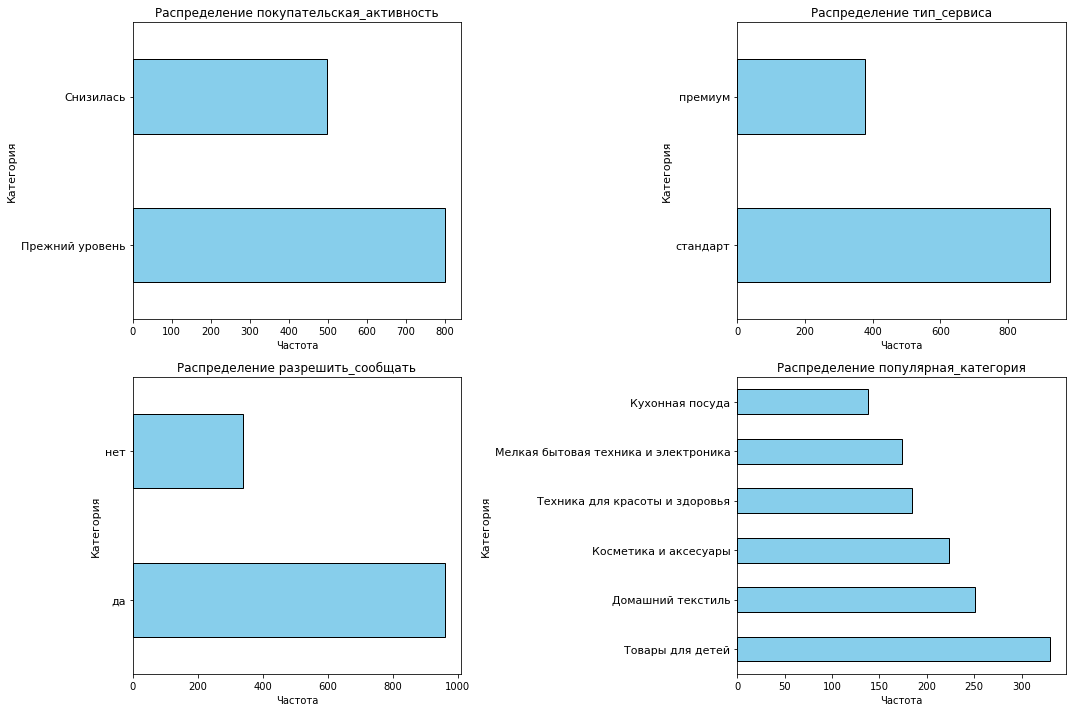

In [32]:
plot_categorical_features(market_file)

**Видим дисбаланс значений в целевом признаке. Наиболее популярная категория - "Товары для детей"**

**Распределение по выручке**

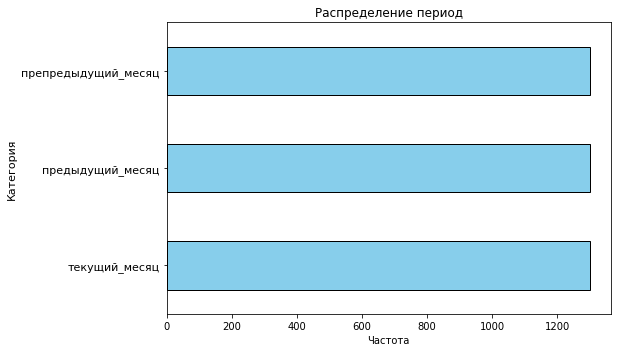

In [33]:
plot_categorical_features(market_money)

In [34]:
market_money_by_period = market_money.pivot_table(index='период', values=['выручка'], aggfunc='sum')
market_money_by_period

выручка
период                        
предыдущий_месяц     6417996.5
препредыдущий_месяц  6272769.0
текущий_месяц        6909449.1

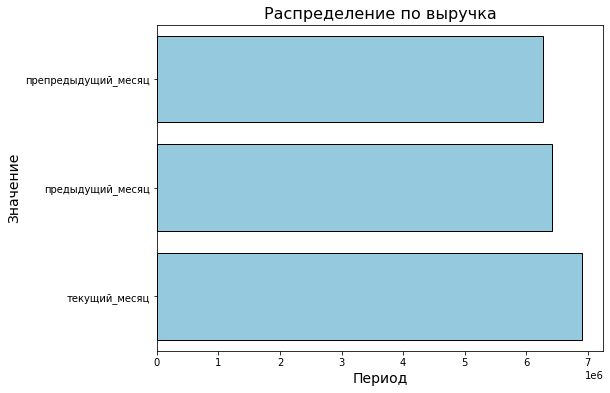

In [35]:
pivot_bar_plot(market_money_by_period, 'выручка')

**Распределение по минутам**

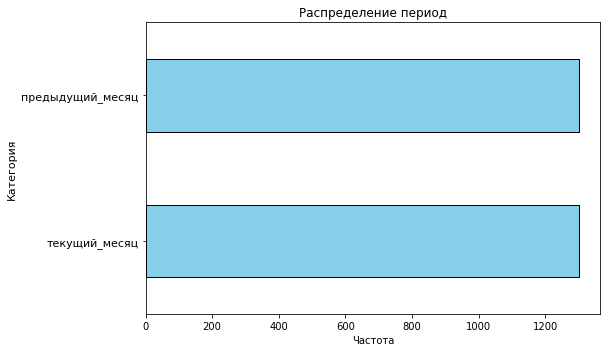

In [36]:
plot_categorical_features(market_time)

In [37]:
market_time_by_period = market_time.pivot_table(index='период', values=['минут'], aggfunc='sum')
market_time_by_period

минут
период                 
предыдущий_месяц  17508
текущий_месяц     17166

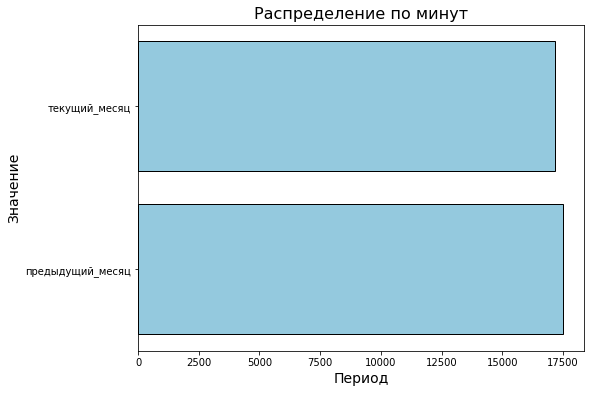

In [38]:
pivot_bar_plot(market_time_by_period, 'минут') 

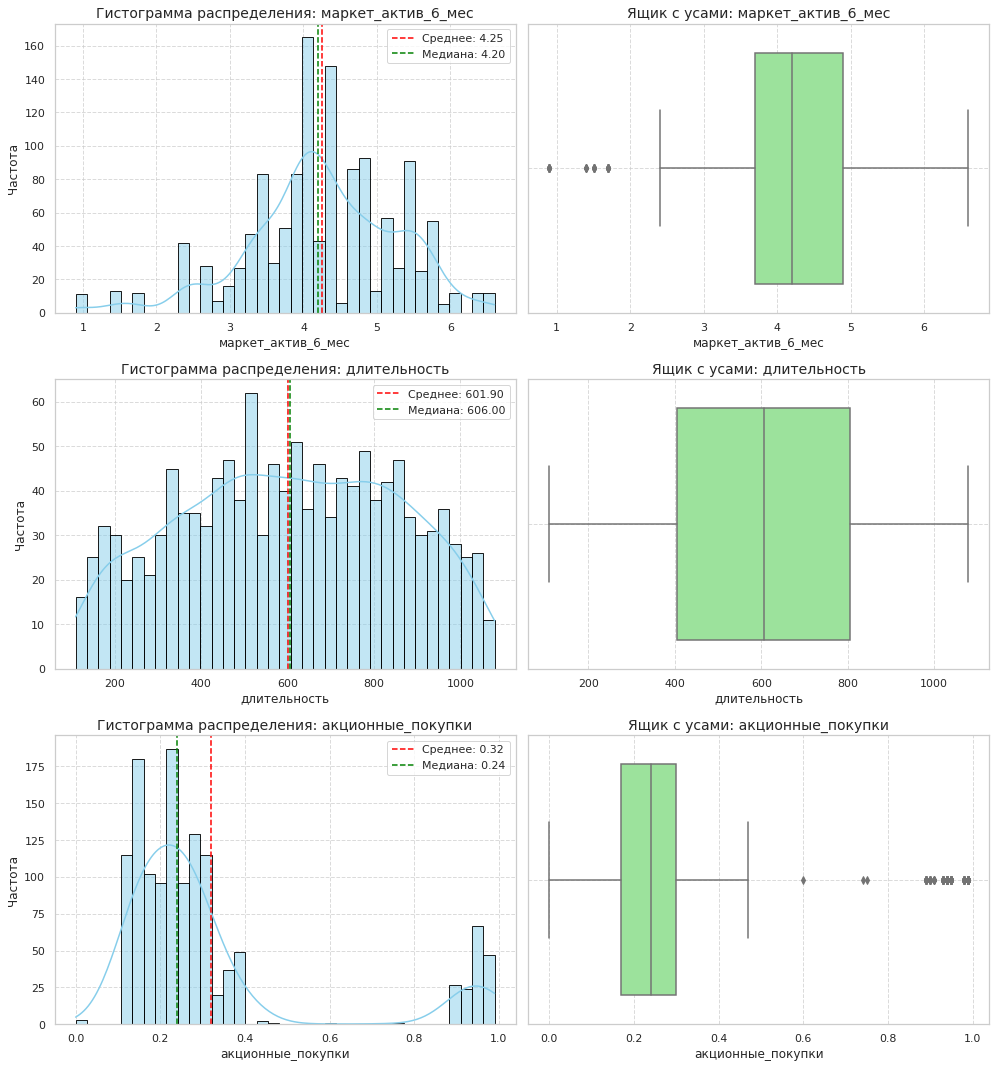

In [39]:
# Построение графиков для выбранных столбцов
columns_to_analyze = [
    'маркет_актив_6_мес',
    'длительность',
    'акционные_покупки',
]


plot_distribution(market_file, columns_to_analyze)

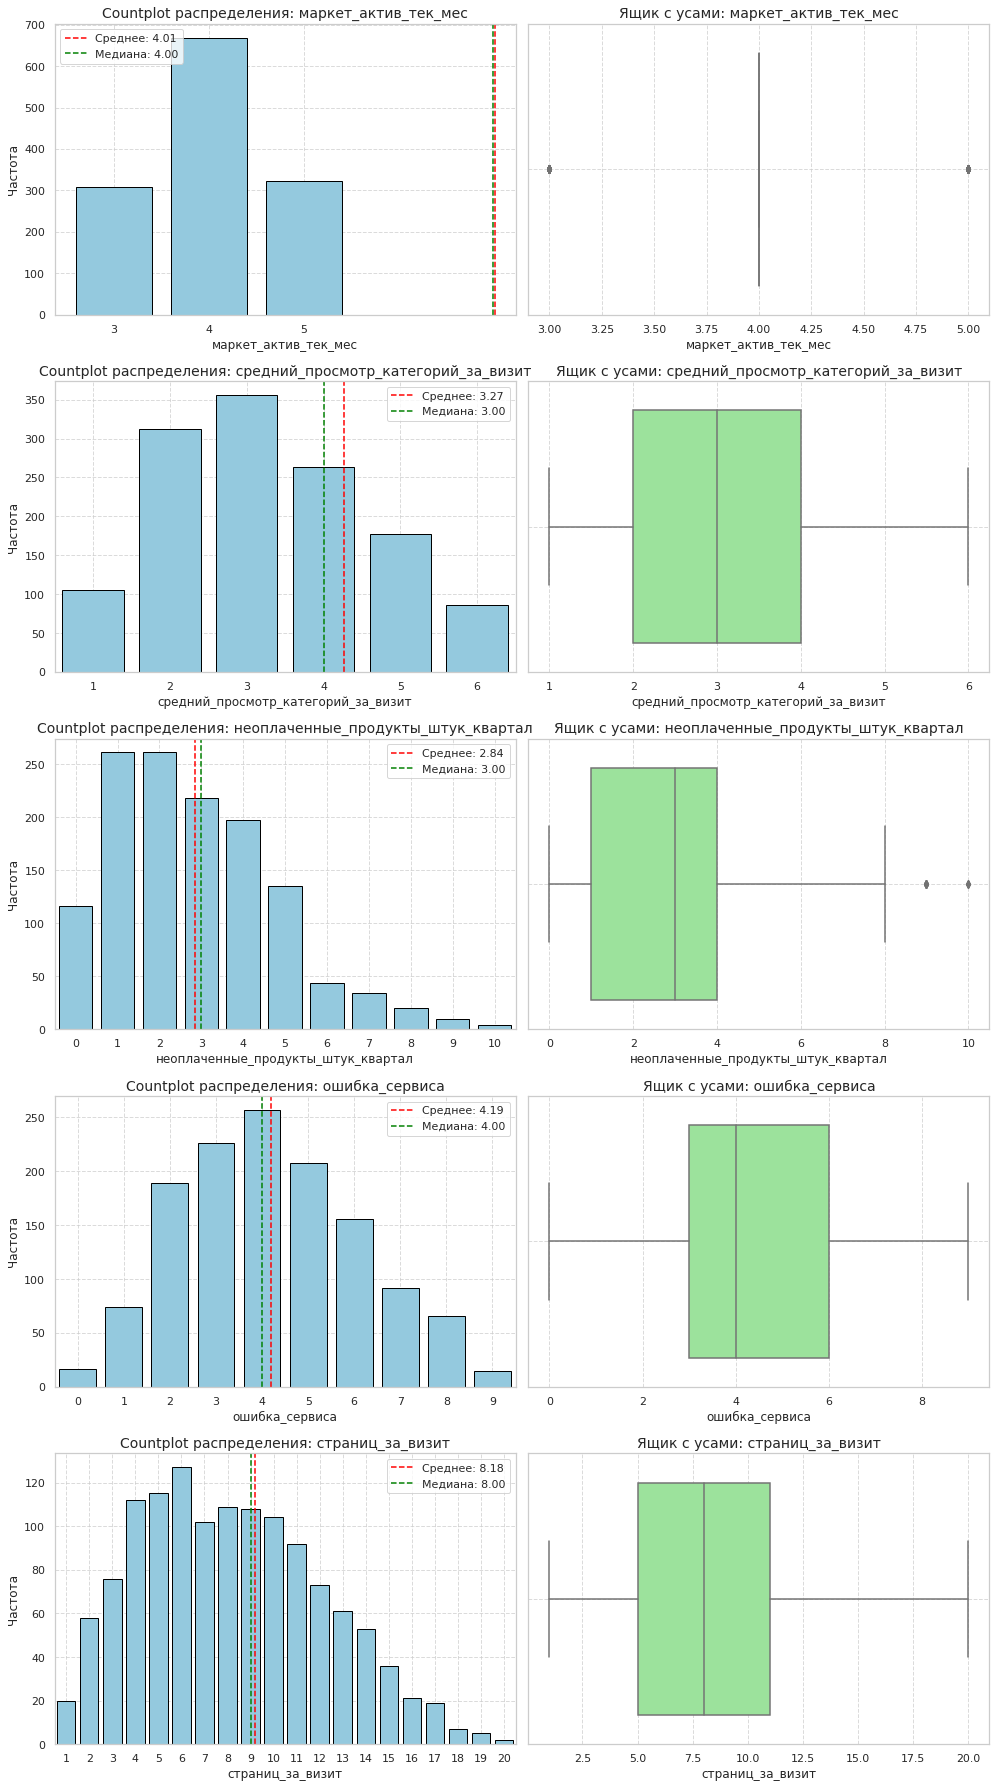

In [40]:
# Построение графиков для выбранных столбцов
columns_to_analyze_discrete = [
    'маркет_актив_тек_мес',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'
]

plot_distribution_discrete(market_file, columns_to_analyze_discrete)

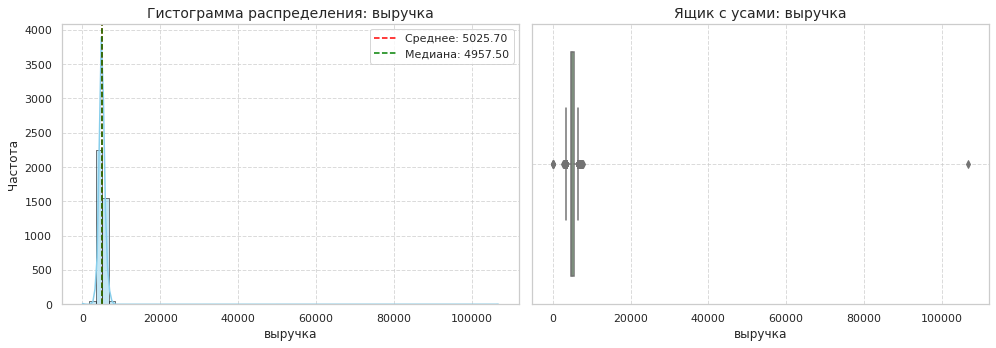

In [41]:
plot_distribution_one(market_money, 'выручка')

In [42]:
# Удаляем выбросы
market_money = market_money[(market_money['выручка'] > 0) & (market_money['выручка'] < 100000)]


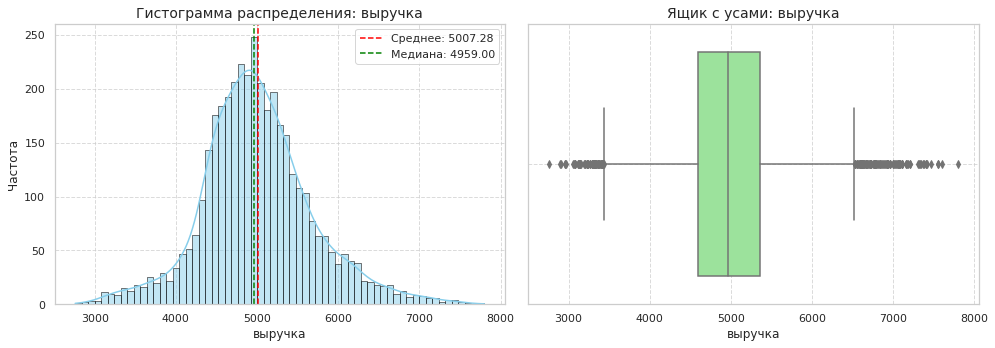

In [43]:
plot_distribution_one(market_money, 'выручка')

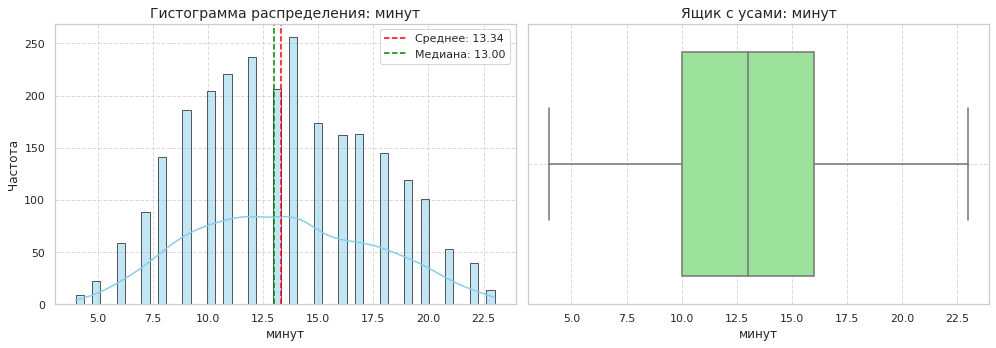

In [44]:
plot_distribution_one(market_time, 'минут')

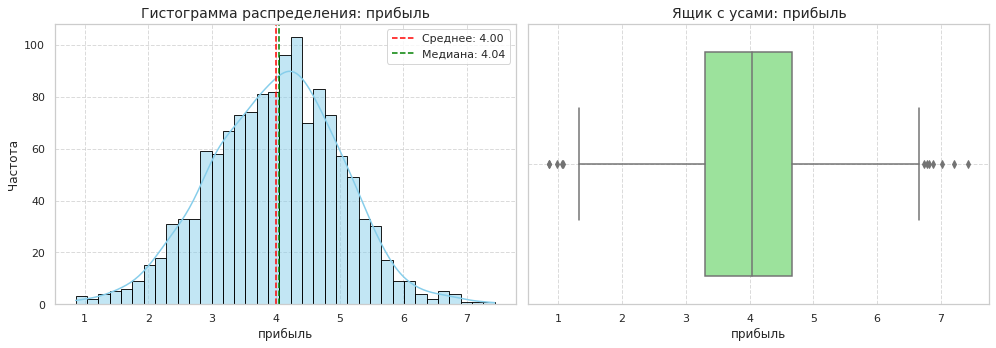

In [45]:
plot_distribution_one(money, 'прибыль')

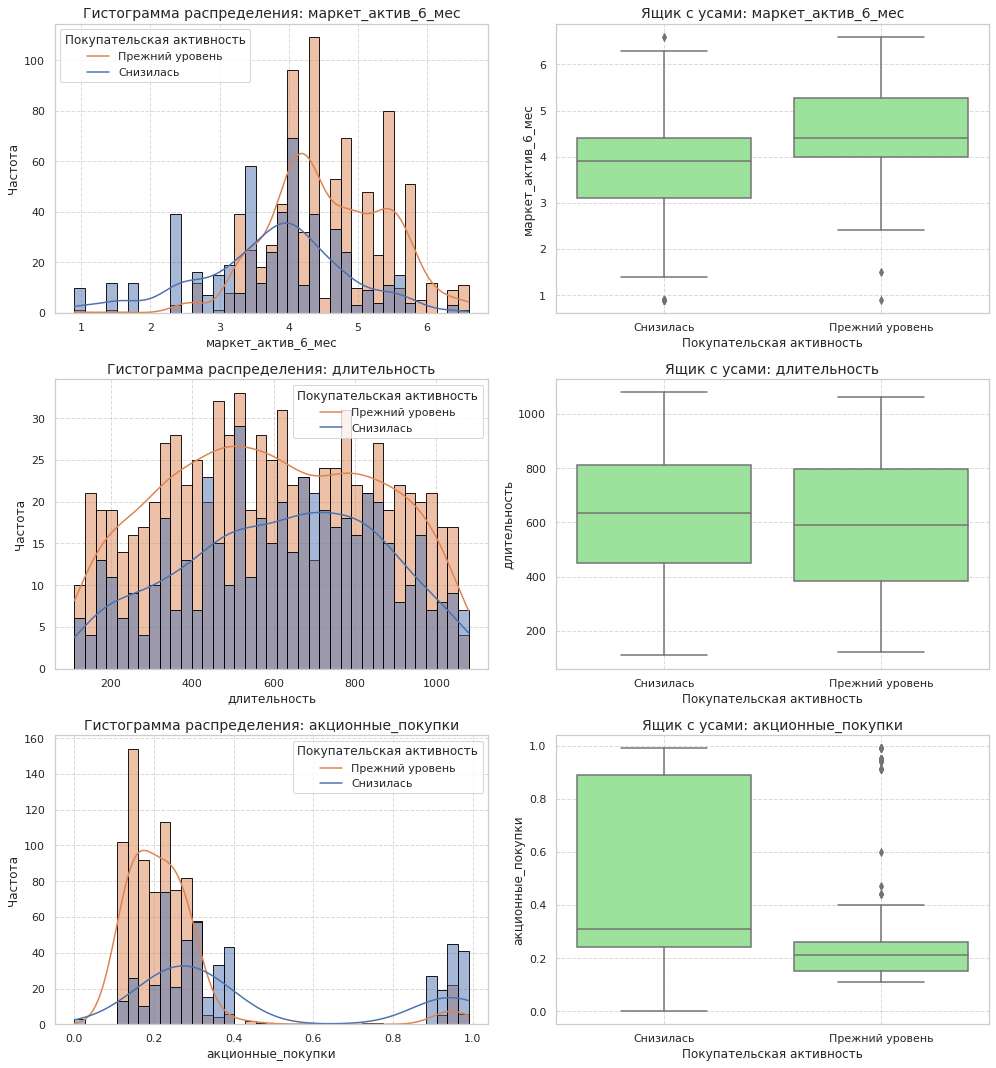

In [46]:
plot_distribution_pa(market_file, columns_to_analyze)


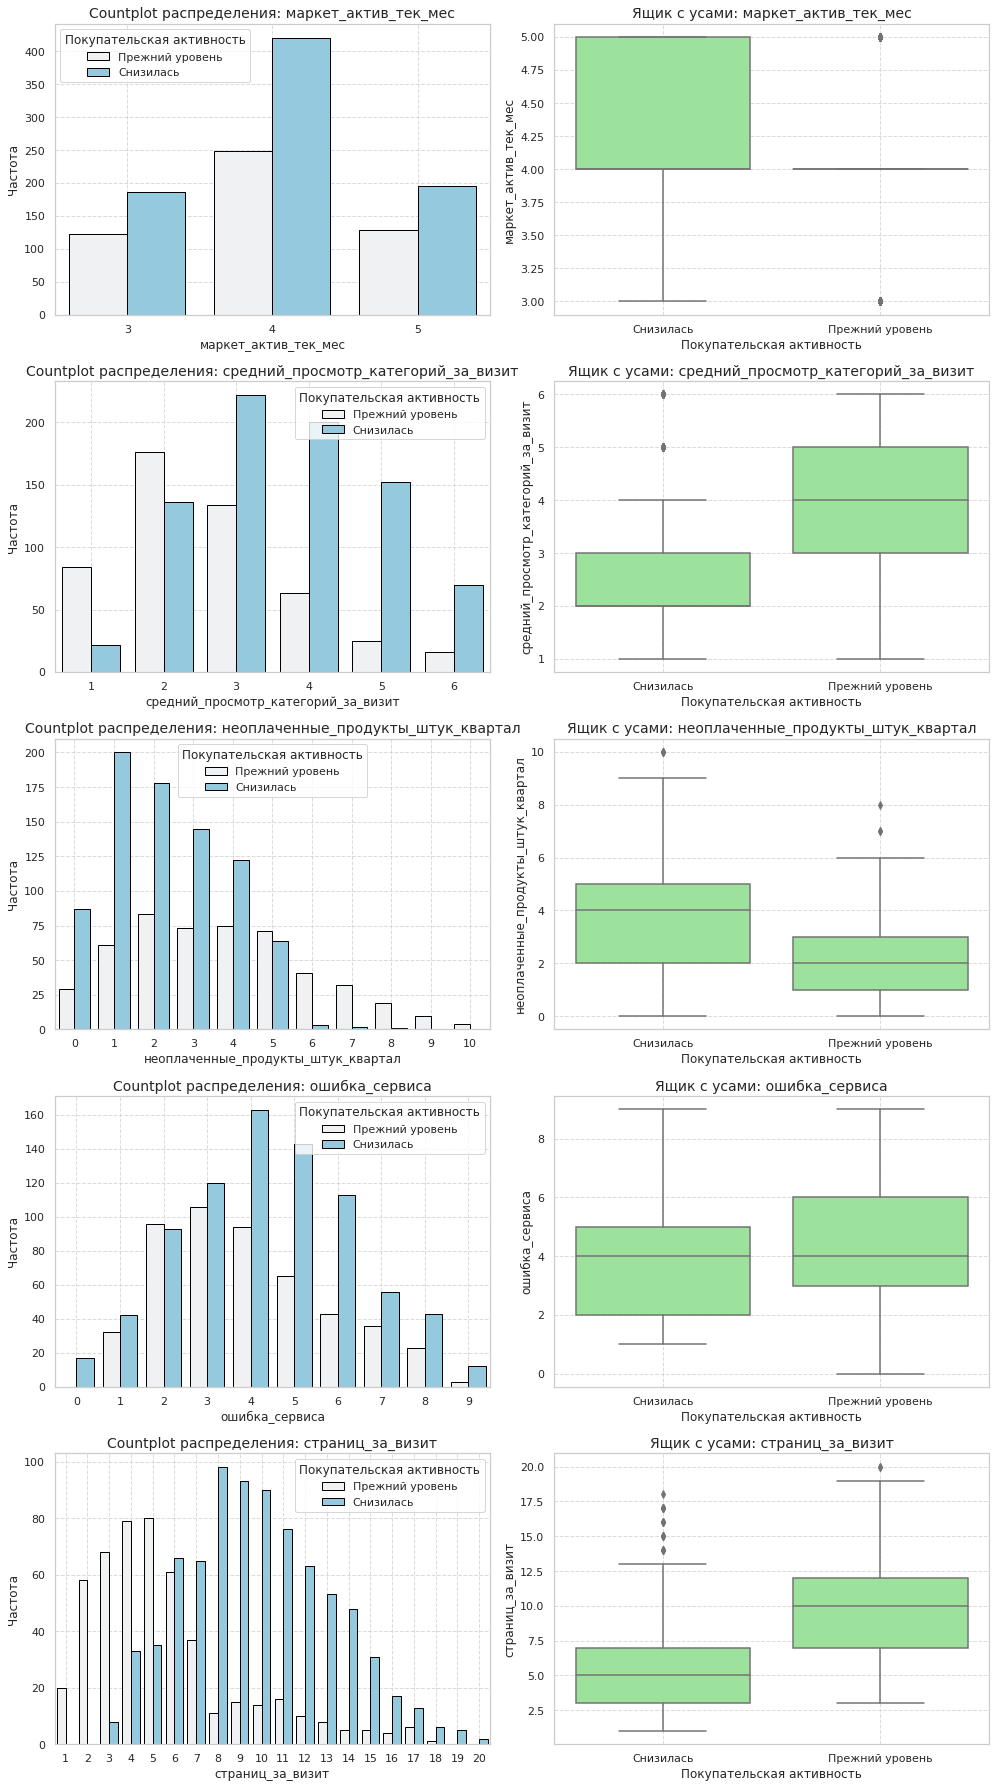

In [47]:
plot_distribution_pa_discrete(market_file, columns_to_analyze_discrete)

**Из графиков видно, что покупатели со сниженной активностью в среднем:**

- Реже посещают интернет-магазин «В один клик»
- Чаще выбирают товары по акции
- Просматривают меньше категорий и страниц за визит
- Имеют больше неоплаченных продуктов за последние 3 месяца (чем покупатели с прежним уровнем активности).

In [48]:
agg_dict = {'период': ['count']}
grouped = market_money.groupby('id').agg(agg_dict)
grouped.columns = ['purchase_count']

# Отбор клиентов с покупательской активностью не менее трёх месяцев
active_customers = grouped[grouped['purchase_count'] >= 3]

# Формирование списка id активных клиентов
active_customer_ids = active_customers.index

# Фильтрация market_file по списку id активных клиентов
market_file = market_file[market_file['id'].isin(active_customer_ids)]

len(market_file)


1296

**Были выполнены следующие шаги:**

- Отбор клиентов с покупательской активностью не менее трёх месяцев.
- Построение графиков распределений категориальных признаков.
- Анализ распределения по выручке и минутам.
- Анализ распределения численных признаков.
- Удаление выбросов.
- Анализ распределения прибыли.

- **Количество клиентов с покупательской активностью не менее трёх месяцев составляет 1296.**

# Объединение таблиц

In [49]:
market_money_grouped = market_money.pivot_table(index=['id'], columns=["период"])
market_money_grouped.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_grouped.reset_index(inplace=True)

market_time_grouped = market_time.pivot_table(index=['id'], columns=["период"])
market_time_grouped.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_grouped.reset_index(inplace=True)


market_data= pd.merge(market_file, market_money_grouped, on='id')
market_data = pd.merge(market_data, market_time_grouped, on='id')
market_data.head(5)



id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
0                 4971.6                      12                   10  
1                 5058.4                       8                   13  
2                 6610.4                      11                   13  
3                 5872.5                       8                   11  
4                 5388.5                      10                   10

In [50]:
analyze(market_data, "market_data")


Анализ DataFrame: market_data

Общая информация:


id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
0                 4971.6                      12                   10  
1                 5058.4                       8                   13  
2                 6610.4                      11                   13  
3                 5872.5                       8                   11  
4                 5388.5                      10                   10

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

None

Описательная статистика:


id покупательская_активность тип_сервиса  \
count     1296.000000                      1296        1296   
unique            NaN                         2           2   
top               NaN           Прежний уровень    стандарт   
freq              NaN                       802         922   
mean    215999.464506                       NaN         NaN   
std        374.327860                       NaN         NaN   
min     215349.000000                       NaN         NaN   
25%     215675.750000                       NaN         NaN   
50%     215999.500000                       NaN         NaN   
75%     216323.250000                       NaN         NaN   
max     216647.000000                       NaN         NaN   

       разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
count                1296         1296.000000           1296.000000   
unique                  2                 NaN                   NaN   
top                    да                 NaN                   NaN   
freq                  959                 NaN                   NaN   
mean                  NaN            4.256404              4.009259   
std                   NaN            1.013525              0.696316   
min                   NaN            0.900000              3.000000   
25%                   NaN            3.700000              4.000000   
50%                   NaN            4.200000              4.000000   
75%                   NaN            4.900000              4.000000   
max                   NaN            6.600000              5.000000   

        длительность  акционные_покупки популярная_категория  \
count    1296.000000        1296.000000                 1296   
unique           NaN                NaN                    6   
top              NaN                NaN     Товары для детей   
freq             NaN                NaN                  329   
mean      602.967593           0.320069                  NaN   
std       249.195823           0.249159                  NaN   
min       121.000000           0.110000                  NaN   
25%       409.500000           0.170000                  NaN   
50%       606.500000           0.240000                  NaN   
75%       806.250000           0.300000                  NaN   
max      1079.000000           0.990000                  NaN   

        средний_просмотр_категорий_за_визит  \
count                           1296.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                               3.267747   
std                                1.355125   
min                                1.000000   
25%                                2.000000   
50%                                3.000000   
75%                                4.000000   
max                                6.000000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
count                          1296.000000     1296.000000       1296.000000   
unique                                 NaN             NaN               NaN   
top                                    NaN             NaN               NaN   
freq                                   NaN             NaN               NaN   
mean                              2.841821        4.184414          8.187500   
std                               1.974074        1.951719          3.978459   
min                               0.000000        0.000000          1.000000   
25%                               1.000000        3.000000          5.000000   
50%                               3.000000        4.000000          8.000000   
75%                               4.000000        6.000000         11.000000   
max                              10.000000        9.000000         20.000000   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
count                1296.000000                 

------------------------------
Анализ столбца: id
Тип данных: int64, Количество уникальных значений: 1296
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
------------------------------ 

------------------------------
Анализ столбца: покупательская_активность
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['Прежний уровень' 'Снизилась']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['премиум' 'стандарт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
Уникальные зн

- В market_data 1296 записей.
- Все столбцы содержат данные без пропусков и дублей.

In [51]:
market_data.shape

(1296, 18)

# Корреляционный анализ

**Сильные корреляции:**

- покупательская_активность и страниц_за_визит (0.75).
- покупательская_активность и минут_предыдущий_месяц (0.69).
- выручка_предыдущий_месяц и выручка_текущий_месяц (0.84).



In [52]:
# Удаление столбца 'id' и установка его в качестве индекса
market_data.set_index('id', inplace=True)

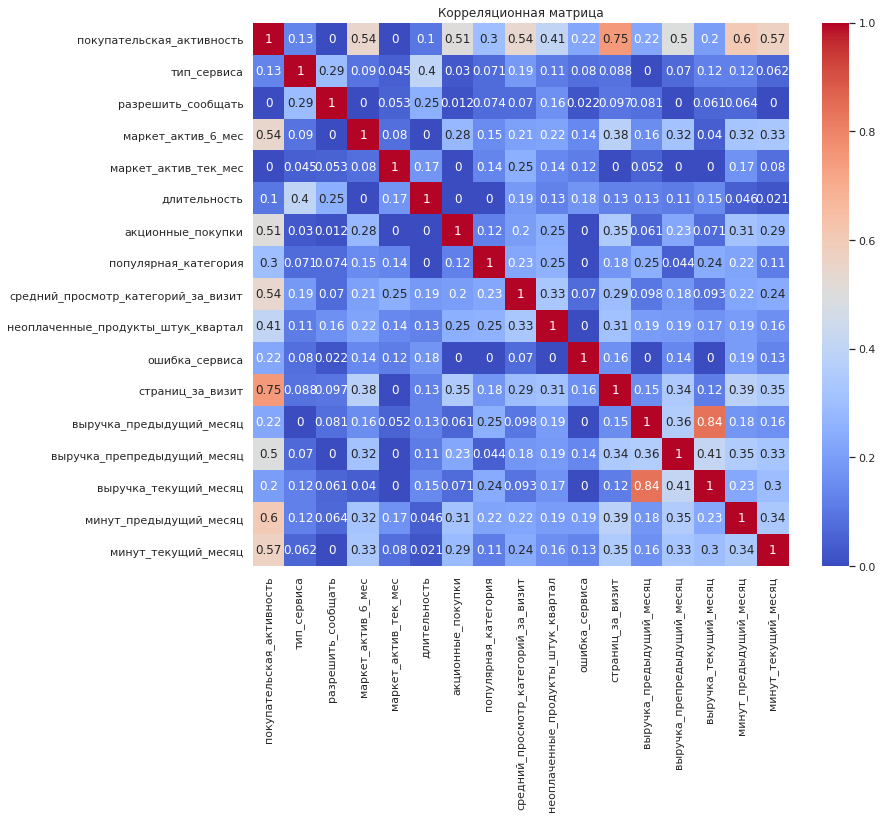

In [53]:
columns_to_analyze = [
    'маркет_актив_6_мес',
    'длительность',
    'акционные_покупки',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'выручка_препредыдущий_месяц'
    
]
correlation_matrix = market_data.phik_matrix(interval_cols=columns_to_analyze)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


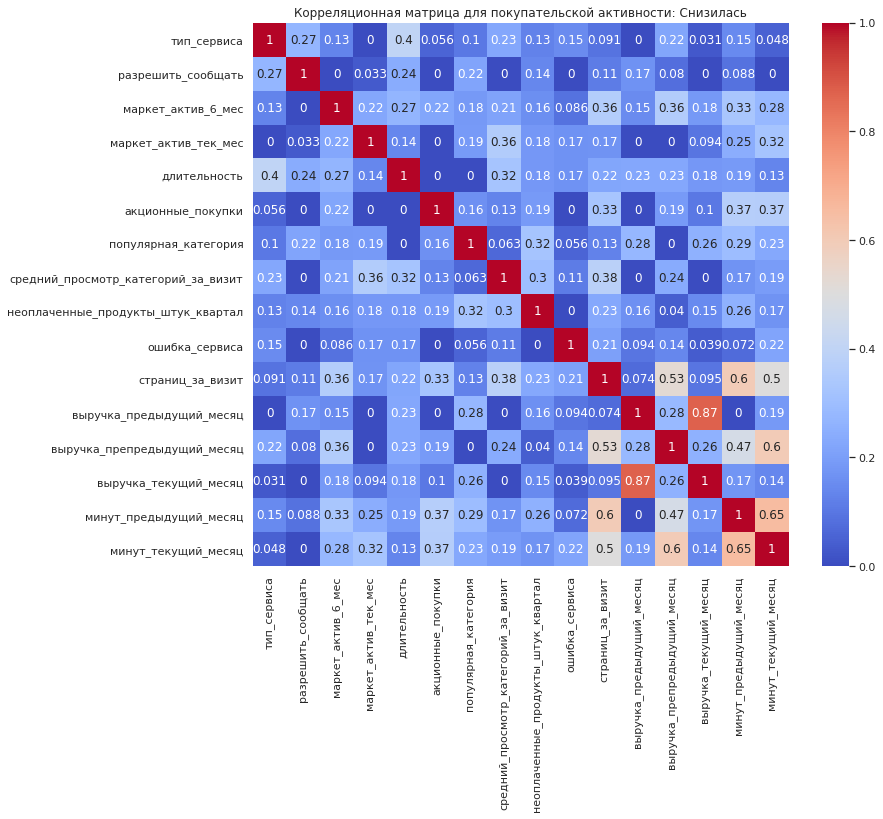

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


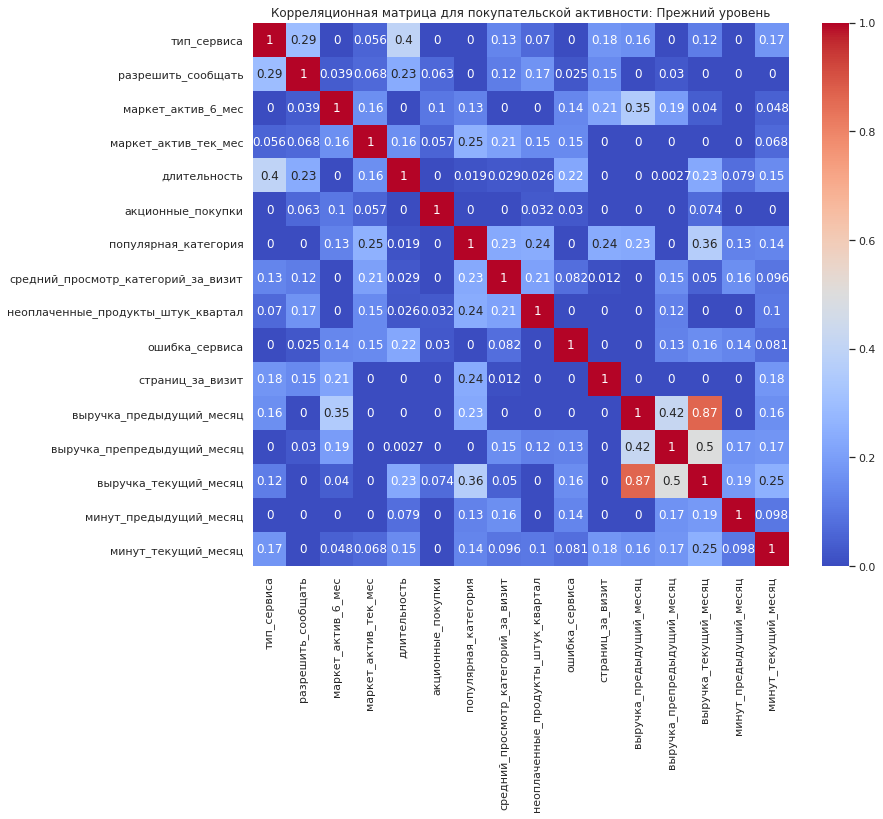

In [54]:
# Построение матриц корреляции для каждого значения целевого признака
for pa_value in market_data['покупательская_активность'].unique():
    subset = market_data[market_data['покупательская_активность'] == pa_value]
    correlation_matrix = subset.phik_matrix(interval_cols=columns_to_analyze)
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Корреляционная матрица для покупательской активности: {pa_value}')
    plt.show()

**Выручка_предыдущий_месяц и выручка_текущий_месяц (0.87): Между этими признаками наблюдается сильная связь.
Удалять не будем, т.к. < 0.9**

# Использование пайплайнов


In [55]:
market_data['акционные_покупки_категория'] = pd.cut(market_data['акционные_покупки'], bins=[-float('inf'), 0.5, float('inf')], labels=['Редко', 'Часто'])

le = LabelEncoder()

market_data['покупательская_активность'] = le.fit_transform(market_data['покупательская_активность'])

market_data.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                 
215349                          1     премиум                 да   
215350                          1    стандарт                нет   
215351                          1    стандарт                 да   
215352                          1    стандарт                нет   
215353                          1    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215349                    5216.0                       4472.0   
215350                    5457.5                       4826.0   
215351                    6158.0                       4793.0   
215352                    5807.5                       4594.0   
215353                    4738.5                       5124.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                                           
215349                 4971.6                      12                   10   
215350                 5058.4                       8                   13   
215351                 6610.4                      11                   13   
215352                 5872.5                       8                   11   
215353                 5388.5                      10                   10   

       акционные_покупки_категория  
id                                  
215349                       Часто  
215350                       Редко  
215351                       Часто  
215352                       Часто  
215353                       Редко

In [56]:
analyze(market_data, "market_data")


Анализ DataFrame: market_data

Общая информация:


покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                 
215349                          1     премиум                 да   
215350                          1    стандарт                нет   
215351                          1    стандарт                 да   
215352                          1    стандарт                нет   
215353                          1    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215349                    5216.0                       4472.0   
215350                    5457.5                       4826.0   
215351                    6158.0                       4793.0   
215352                    5807.5                       4594.0   
215353                    4738.5                       5124.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                                           
215349                 4971.6                      12                   10   
215350                 5058.4                       8                   13   
215351                 6610.4                      11                   13   
215352                 5872.5                       8                   11   
215353                 5388.5                      10                   10   

       акционные_покупки_категория  
id                                  
215349                       Часто  
215350                       Редко  
215351                       Часто  
215352                       Часто  
215353                       Редко

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   покупательская_активность            1296 non-null   int64   
 1   тип_сервиса                          1296 non-null   object  
 2   разрешить_сообщать                   1296 non-null   object  
 3   маркет_актив_6_мес                   1296 non-null   float64 
 4   маркет_актив_тек_мес                 1296 non-null   int64   
 5   длительность                         1296 non-null   int64   
 6   акционные_покупки                    1296 non-null   float64 
 7   популярная_категория                 1296 non-null   object  
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 10  ошибка_сервиса                       1296 non-null   int64   
 11  страниц_за

None

Описательная статистика:


покупательская_активность тип_сервиса разрешить_сообщать  \
count                 1296.000000        1296               1296   
unique                        NaN           2                  2   
top                           NaN    стандарт                 да   
freq                          NaN         922                959   
mean                     0.381173         NaN                NaN   
std                      0.485862         NaN                NaN   
min                      0.000000         NaN                NaN   
25%                      0.000000         NaN                NaN   
50%                      0.000000         NaN                NaN   
75%                      1.000000         NaN                NaN   
max                      1.000000         NaN                NaN   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count          1296.000000           1296.000000   1296.000000   
unique                 NaN                   NaN           NaN   
top                    NaN                   NaN           NaN   
freq                   NaN                   NaN           NaN   
mean              4.256404              4.009259    602.967593   
std               1.013525              0.696316    249.195823   
min               0.900000              3.000000    121.000000   
25%               3.700000              4.000000    409.500000   
50%               4.200000              4.000000    606.500000   
75%               4.900000              4.000000    806.250000   
max               6.600000              5.000000   1079.000000   

        акционные_покупки популярная_категория  \
count         1296.000000                 1296   
unique                NaN                    6   
top                   NaN     Товары для детей   
freq                  NaN                  329   
mean             0.320069                  NaN   
std              0.249159                  NaN   
min              0.110000                  NaN   
25%              0.170000                  NaN   
50%              0.240000                  NaN   
75%              0.300000                  NaN   
max              0.990000                  NaN   

        средний_просмотр_категорий_за_визит  \
count                           1296.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                               3.267747   
std                                1.355125   
min                                1.000000   
25%                                2.000000   
50%                                3.000000   
75%                                4.000000   
max                                6.000000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
count                          1296.000000     1296.000000       1296.000000   
unique                                 NaN             NaN               NaN   
top                                    NaN             NaN               NaN   
freq                                   NaN             NaN               NaN   
mean                              2.841821        4.184414          8.187500   
std                               1.974074        1.951719          3.978459   
min                               0.000000        0.000000          1.000000   
25%                               1.000000        3.000000          5.000000   
50%                               3.000000        4.000000          8.000000   
75%                               4.000000        6.000000         11.000000   
max                              10.000000        9.000000         20.000000   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
count                1296.000000                  1296.000000   
unique                       NaN                          NaN   
top                          NaN                          NaN   
freq       

------------------------------
Анализ столбца: покупательская_активность
Тип данных: int64, Количество уникальных значений: 2
Уникальные значения: [0 1]
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 802, Процент 0: 61.88%
------------------------------ 

------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['премиум' 'стандарт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['да' 'нет']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: маркет_актив_6_мес
Тип данных: float64, Количество уникальных

**Появились 11 полных дублей из-зи того, что id сделали индексом, удалять не будем.**

In [57]:
# Разделение данных на признаки и целевую переменную
X = market_data.drop(['покупательская_активность'], axis=1)
y = market_data['покупательская_активность']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

In [58]:
# Проверка размеров и размерностей выборок
print("Размерность обучающей выборки:", X_train.shape)
print("Количество строк в обучающей выборке:", X_train.shape[0])
print("Количество столбцов в обучающей выборке:", X_train.shape[1])

print("Размерность тестовой выборки:", X_test.shape)
print("Количество строк в тестовой выборке:", X_test.shape[0])
print("Количество столбцов в тестовой выборке:", X_test.shape[1])

print("Размерность целевой переменной (обучающая выборка):", y_train.shape)
print("Размерность целевой переменной (тестовая выборка):", y_test.shape)

Размерность обучающей выборки: (972, 17)
Количество строк в обучающей выборке: 972
Количество столбцов в обучающей выборке: 17
Размерность тестовой выборки: (324, 17)
Количество строк в тестовой выборке: 324
Количество столбцов в тестовой выборке: 17
Размерность целевой переменной (обучающая выборка): (972,)
Размерность целевой переменной (тестовая выборка): (324,)


In [59]:
# Определение типов признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['акционные_покупки_категория']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит',
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
               'минут_предыдущий_месяц', 'минут_текущий_месяц']



In [60]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['Редко','Часто']],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


In [61]:
# Определение параметров для RandomizedSearchCV
param_grid = [
# Параметры для DecisionTreeClassifier
{
'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
'models__max_depth': range(3, 8),
'models__min_samples_split': range(2, 6),
'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
},
# Параметры для KNeighborsClassifier
{
'models': [KNeighborsClassifier()],
'models__n_neighbors': range(3, 8),
'models__metric': ['euclidean', 'manhattan', 'minkowski'],
'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
},
# Параметры для LogisticRegression
{
'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
'models__penalty': ['l1', 'l2'],
'models__C': range(1,4),
'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
},
# Параметры для SVC
{
'models': [SVC(random_state=RANDOM_STATE, probability=True)],
'models__kernel': ['linear', 'rbf', 'poly'],
'models__C': range(1,4),
'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}
]


In [62]:
# Запуск RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    pipe_final, param_grid, cv=5, scoring='roc_auc', random_state=RANDOM_STATE, n_jobs=-1
)
randomized_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория',
                                                                                'тип_сервиса']),
                                                                              ('ord',...
                                                                       solver='liblinear')],
                                         'models__C': range(1, 4),
                                         'models__penalty': ['l1', 'l2'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 4),
                                         'models__kernel': ['linear', 'rbf',
                                                            'poly'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [63]:
# Вывод результатов
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Результат на кросс-валидации:', round(randomized_search.best_score_, 2))


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория',
                                                   'тип_сервиса']),
                               

In [64]:
# Оценка модели на тестовой выборке
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba), 2)}')
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.92
Метрика F1-score на тестовой выборке: 0.9


*RandomizedSearchCV:*
- Нашел лучшую модель LogisticRegression с L1-регуляризацией (C=3, solver='liblinear'). Метрика лучшей модели на тренировочной выборке: 0.9
- Достиг метрики ROC-AUC = 0.92 и F1-score = 0.9 на тестовых данных.


# Анализ важности признаков

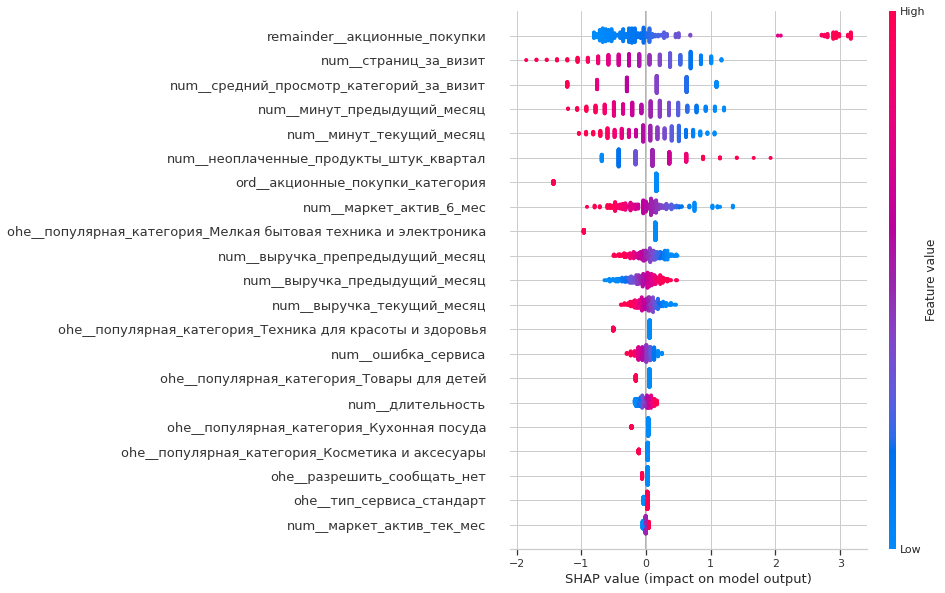

In [65]:
# Подгоняем препроцессор к тренировочным данным и преобразуем как тренировочные, так и тестовые данные
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

# Получаем имена признаков из препроцессора
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

# Преобразуем преобразованные тестовые данные в DataFrame pandas с правильными именами признаков
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

# Создаем explainer SHAP для модели
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

# Вычисляем значения SHAP для тестовых данных
shap_values = explainer(X_test_2)
shap.plots.beeswarm(shap_values, max_display=40)

**Сильнее всего влияют на целевой признак:**
- Страниц_за_визит (пользователи с прежним уровнем активности смотрят больше страниц за визит), 
- Средний_просмотр_категорий_за_визит (пользователи с прежним уровнем активности смотрят больше категорий за визит), 
- мин_предыдущий_месяц (пользователи с прежним уровнем активности проводят больше времени на сайте), 
- мин_текущий_месяц, 
- неоплаченный_продукты_штук_квартал ( у пользователей с прежним уровнем активности меньше неоплаченных товаров в корзине)

**Мало значимы для модели:**
- популярная категория, М
- маркет_актив_тек_мес, 
- разрешить сообщать, 
- тип_сервиса, 
- выручка_текущий_месяц, 
- Длительность, 
- Ошибка_сервиса, 
- Выручка_предыдущий_месяц


**Клиенты с прежним уровнем активности, проводят больше времени на сайте, смотрят больше страниц и категорий за визит, при этом у них остается меньше неоплаченных товаров в корзине. Чтобы увеличить время, проведенное на сайте, необходимо предложить клиентам персонализированный контент в зависимости от их интересов, просмотров, отложенных товаров и прошлых покупок.**

# Сегментация покупателей

*Наиболее удобный сегмент для стимулирования покупательской активности, на мой взгляд, **группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью**. Вот почему: клиенты с высокой прибыльностью, скорее всего, совершают дорогие покупки или покупают часто. Увеличение их активности может привести к значительному росту продаж и прибыли.*


In [66]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

In [67]:
X_test_seg = X_test.copy()
X_train_seg = X_train.copy()
X_test_seg['вероятность_снижения'] = y_test_proba
X_train_seg['вероятность_снижения'] = y_train_proba
df_seg = pd.concat([X_train_seg, X_test_seg])

money = money.set_index('id')
df_seg = df_seg.join(money)

In [68]:
df_seg.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215858                    5170.5                       4347.0   
215361                    6400.0                       4597.0   
215884                    4113.0                       4626.0   
216564                    4930.0                       5269.0   
215715                    3716.0                       4691.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                                           
215858                 6014.2                      20                    6   
215361                 3789.7                      11                   13   
215884                 3798.4                      13                   10   
216564                 4766.2                      14                   19   
215715                 4600.0                      10                   10   

       акционные_покупки_категория  вероятность_снижения  прибыль  
id                                                                 
215858                       Редко              0.052273     4.37  
215361                       Редко              0.708721     4.03  
215884                       Редко              0.059390     4.37  
216564                       Часто              0.723770     5.58  
215715                       Редко              0.832510     4.87

In [69]:
analyze(df_seg, "df_seg")


Анализ DataFrame: df_seg

Общая информация:


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215858                    5170.5                       4347.0   
215361                    6400.0                       4597.0   
215884                    4113.0                       4626.0   
216564                    4930.0                       5269.0   
215715                    3716.0                       4691.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                                           
215858                 6014.2                      20                    6   
215361                 3789.7                      11                   13   
215884                 3798.4                      13                   10   
216564                 4766.2                      14                   19   
215715                 4600.0                      10                   10   

       акционные_покупки_категория  вероятность_снижения  прибыль  
id                                                                 
215858                       Редко              0.052273     4.37  
215361                       Редко              0.708721     4.03  
215884                       Редко              0.059390     4.37  
216564                       Часто              0.723770     5.58  
215715                       Редко              0.832510     4.87

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215858 to 215670
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   тип_сервиса                          1296 non-null   object  
 1   разрешить_сообщать                   1296 non-null   object  
 2   маркет_актив_6_мес                   1296 non-null   float64 
 3   маркет_актив_тек_мес                 1296 non-null   int64   
 4   длительность                         1296 non-null   int64   
 5   акционные_покупки                    1296 non-null   float64 
 6   популярная_категория                 1296 non-null   object  
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 9   ошибка_сервиса                       1296 non-null   int64   
 10  страниц_за_визит                     1296 non-null   int64   
 11  выручка_пр

None

Описательная статистика:


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
count         1296               1296         1296.000000   
unique           2                  2                 NaN   
top       стандарт                 да                 NaN   
freq           922                959                 NaN   
mean           NaN                NaN            4.256404   
std            NaN                NaN            1.013525   
min            NaN                NaN            0.900000   
25%            NaN                NaN            3.700000   
50%            NaN                NaN            4.200000   
75%            NaN                NaN            4.900000   
max            NaN                NaN            6.600000   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
count            1296.000000   1296.000000        1296.000000   
unique                   NaN           NaN                NaN   
top                      NaN           NaN                NaN   
freq                     NaN           NaN                NaN   
mean                4.009259    602.967593           0.320069   
std                 0.696316    249.195823           0.249159   
min                 3.000000    121.000000           0.110000   
25%                 4.000000    409.500000           0.170000   
50%                 4.000000    606.500000           0.240000   
75%                 4.000000    806.250000           0.300000   
max                 5.000000   1079.000000           0.990000   

       популярная_категория  средний_просмотр_категорий_за_визит  \
count                  1296                          1296.000000   
unique                    6                                  NaN   
top        Товары для детей                                  NaN   
freq                    329                                  NaN   
mean                    NaN                             3.267747   
std                     NaN                             1.355125   
min                     NaN                             1.000000   
25%                     NaN                             2.000000   
50%                     NaN                             3.000000   
75%                     NaN                             4.000000   
max                     NaN                             6.000000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
count                          1296.000000     1296.000000       1296.000000   
unique                                 NaN             NaN               NaN   
top                                    NaN             NaN               NaN   
freq                                   NaN             NaN               NaN   
mean                              2.841821        4.184414          8.187500   
std                               1.974074        1.951719          3.978459   
min                               0.000000        0.000000          1.000000   
25%                               1.000000        3.000000          5.000000   
50%                               3.000000        4.000000          8.000000   
75%                               4.000000        6.000000         11.000000   
max                              10.000000        9.000000         20.000000   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
count                1296.000000                  1296.000000   
unique                       NaN                          NaN   
top                          NaN                          NaN   
freq                         NaN                          NaN   
mean                 4947.468750                  4836.202160   
std                   700.797239                   333.514091   
min                  2890.000000                  4098.000000   
25%                  4498.125000                  4584.500000   
50%                  5005.500000                  4810.500000   
75%                  5405.625000                  5056.000000   


------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['премиум' 'стандарт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['да' 'нет']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: маркет_актив_6_мес
Тип данных: float64, Количество уникальных значений: 41
Первые 10 уникальных значений: [0.9 1.4 1.5 1.7 2.4 2.6 2.7 2.9 3.  3.1]
Последние 10 уникальных значений: [5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.1 6.3 6.6]
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
---------------------------

In [70]:
threshold = 0.7
df_seg['высокая_вероятность_снижения'] = df_seg['вероятность_снижения'] > threshold
threshold_money = 5
df_seg['высокая_прибыльность'] = df_seg['прибыль'] > threshold_money
df_seg['целевой_сегмент'] = (df_seg['высокая_вероятность_снижения']) & (df_seg['высокая_прибыльность'])
df_seg.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  ...  \
id                                                          ...   
215858                                   4               7  ...   
215361                                   5               2  ...   
215884                                   1               3  ...   
216564                                   7               5  ...   
215715                                   2               2  ...   

        выручка_препредыдущий_месяц  выручка_текущий_месяц  \
id                                                           
215858                       4347.0                 6014.2   
215361                       4597.0                 3789.7   
215884                       4626.0                 3798.4   
216564                       5269.0                 4766.2   
215715                       4691.0                 4600.0   

        минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                    
215858                      20                    6   
215361                      11                   13   
215884                      13                   10   
216564                      14                   19   
215715                      10                   10   

        акционные_покупки_категория  вероятность_снижения прибыль  \
id                                                                  
215858                        Редко              0.052273    4.37   
215361                        Редко              0.708721    4.03   
215884                        Редко              0.059390    4.37   
216564                        Часто              0.723770    5.58   
215715                        Редко              0.832510    4.87   

        высокая_вероятность_снижения  высокая_прибыльность  целевой_сегмент  
id                                                                           
215858                         False                 False            False  
215361                          True                 False            False  
215884                         False                 False            False  
216564                          True                  True             True  
215715                          True                 False            False  

[5 rows x 22 columns]

In [71]:
analyze(df_seg, "df_seg")


Анализ DataFrame: df_seg

Общая информация:


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
215858                     4           510               0.15   
215361                     4           199               0.23   
215884                     5           997               0.17   
216564                     4           342               0.94   
215715                     5           873               0.39   

                        популярная_категория  \
id                                             
215858  Мелкая бытовая техника и электроника   
215361        Техника для красоты и здоровья   
215884  Мелкая бытовая техника и электроника   
216564                       Кухонная посуда   
215715                      Товары для детей   

        средний_просмотр_категорий_за_визит  \
id                                            
215858                                    2   
215361                                    4   
215884                                    5   
216564                                    2   
215715                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  ...  \
id                                                          ...   
215858                                   4               7  ...   
215361                                   5               2  ...   
215884                                   1               3  ...   
216564                                   7               5  ...   
215715                                   2               2  ...   

        выручка_препредыдущий_месяц  выручка_текущий_месяц  \
id                                                           
215858                       4347.0                 6014.2   
215361                       4597.0                 3789.7   
215884                       4626.0                 3798.4   
216564                       5269.0                 4766.2   
215715                       4691.0                 4600.0   

        минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                    
215858                      20                    6   
215361                      11                   13   
215884                      13                   10   
216564                      14                   19   
215715                      10                   10   

        акционные_покупки_категория  вероятность_снижения прибыль  \
id                                                                  
215858                        Редко              0.052273    4.37   
215361                        Редко              0.708721    4.03   
215884                        Редко              0.059390    4.37   
216564                        Часто              0.723770    5.58   
215715                        Редко              0.832510    4.87   

        высокая_вероятность_снижения  высокая_прибыльность  целевой_сегмент  
id                                                                           
215858                         False                 False            False  
215361                          True                 False            False  
215884                         False                 False            False  
216564                          True                  True             True  
215715                          True                 False            False  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215858 to 215670
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   тип_сервиса                          1296 non-null   object  
 1   разрешить_сообщать                   1296 non-null   object  
 2   маркет_актив_6_мес                   1296 non-null   float64 
 3   маркет_актив_тек_мес                 1296 non-null   int64   
 4   длительность                         1296 non-null   int64   
 5   акционные_покупки                    1296 non-null   float64 
 6   популярная_категория                 1296 non-null   object  
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 9   ошибка_сервиса                       1296 non-null   int64   
 10  страниц_за_визит                     1296 non-null   int64   
 11  выручка_пр

None

Описательная статистика:


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
count         1296               1296         1296.000000   
unique           2                  2                 NaN   
top       стандарт                 да                 NaN   
freq           922                959                 NaN   
mean           NaN                NaN            4.256404   
std            NaN                NaN            1.013525   
min            NaN                NaN            0.900000   
25%            NaN                NaN            3.700000   
50%            NaN                NaN            4.200000   
75%            NaN                NaN            4.900000   
max            NaN                NaN            6.600000   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
count            1296.000000   1296.000000        1296.000000   
unique                   NaN           NaN                NaN   
top                      NaN           NaN                NaN   
freq                     NaN           NaN                NaN   
mean                4.009259    602.967593           0.320069   
std                 0.696316    249.195823           0.249159   
min                 3.000000    121.000000           0.110000   
25%                 4.000000    409.500000           0.170000   
50%                 4.000000    606.500000           0.240000   
75%                 4.000000    806.250000           0.300000   
max                 5.000000   1079.000000           0.990000   

       популярная_категория  средний_просмотр_категорий_за_визит  \
count                  1296                          1296.000000   
unique                    6                                  NaN   
top        Товары для детей                                  NaN   
freq                    329                                  NaN   
mean                    NaN                             3.267747   
std                     NaN                             1.355125   
min                     NaN                             1.000000   
25%                     NaN                             2.000000   
50%                     NaN                             3.000000   
75%                     NaN                             4.000000   
max                     NaN                             6.000000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  ...  \
count                          1296.000000     1296.000000  ...   
unique                                 NaN             NaN  ...   
top                                    NaN             NaN  ...   
freq                                   NaN             NaN  ...   
mean                              2.841821        4.184414  ...   
std                               1.974074        1.951719  ...   
min                               0.000000        0.000000  ...   
25%                               1.000000        3.000000  ...   
50%                               3.000000        4.000000  ...   
75%                               4.000000        6.000000  ...   
max                              10.000000        9.000000  ...   

        выручка_препредыдущий_месяц  выручка_текущий_месяц  \
count                   1296.000000            1296.000000   
unique                          NaN                    NaN   
top                             NaN                    NaN   
freq                            NaN                    NaN   
mean                    4836.202160            5238.096065   
std                      333.514091             834.318717   
min                     4098.000000            2758.700000   
25%                     4584.500000            4706.050000   
50%                     4810.500000            5179.950000   
75%                     5056.000000            5759.275000   
max                     5663.000000            7799.400000   

        минут_предыдущий_месяц  минут_текущий_месяц  \
count              1296.000000          1296.000000   
unique          

------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['премиум' 'стандарт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['да' 'нет']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: маркет_актив_6_мес
Тип данных: float64, Количество уникальных значений: 41
Первые 10 уникальных значений: [0.9 1.4 1.5 1.7 2.4 2.6 2.7 2.9 3.  3.1]
Последние 10 уникальных значений: [5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.1 6.3 6.6]
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
---------------------------

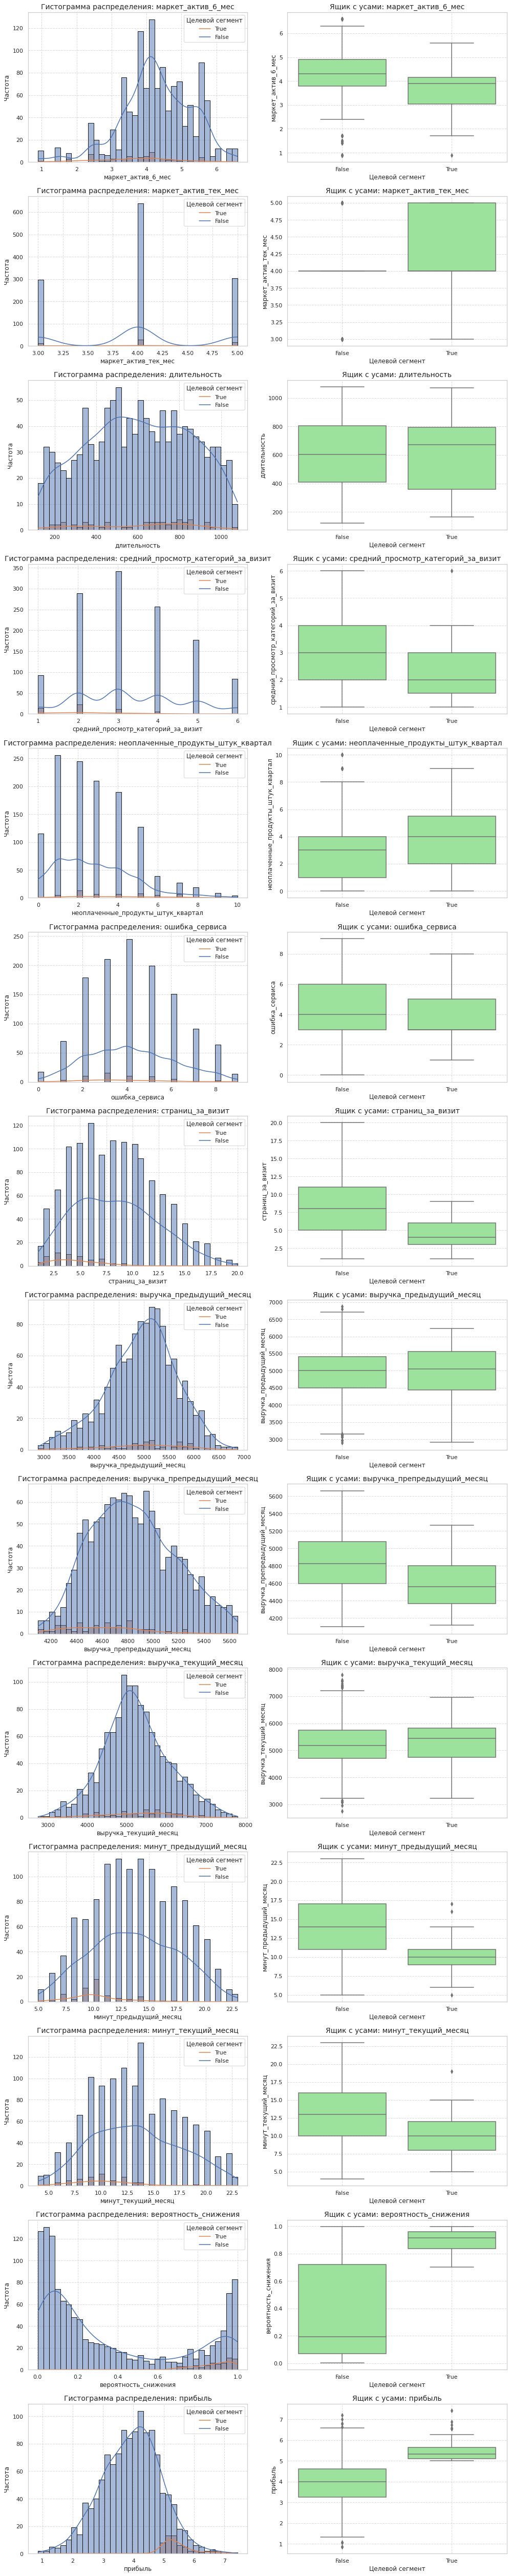

In [72]:
columns_to_analyze = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'вероятность_снижения',
    'прибыль'
    
]

plot_distribution_cs(df_seg, columns_to_analyze)

- среднемесячное значение маркетинговых коммуникаций компании с целевыми клиентами в среднем меньше, чем с клиентами не из рассматриваемого сегмента,
- покупатели из целевого сегмента смотрят меньше категорий за визит, в среднем 2,
- у них больше неоплаченных товаров в корзине,
- они существенно меньше просматривают страниц за визит, в среднем 4,
- выручка стабильно растет (рассматрваем историю за 3 месяца),
- проводят на сайте в среднем 10 минут за визит, что меньше в сравнении с остальными покупателями не из сегмента,


In [73]:
df_seg_target = df_seg[df_seg['целевой_сегмент'] == True].copy()
analyze(df_seg_target, "df_seg_target")


Анализ DataFrame: df_seg_target

Общая информация:


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
216564    стандарт                 да                 5.6   
215396    стандарт                 да                 3.4   
216357    стандарт                нет                 4.1   
215494    стандарт                нет                 5.6   
215456    стандарт                 да                 1.7   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
216564                     4           342               0.94   
215396                     5           706               0.22   
216357                     4           184               0.99   
215494                     5           372               0.23   
215456                     4           449               0.23   

         популярная_категория  средний_просмотр_категорий_за_визит  \
id                                                                   
216564        Кухонная посуда                                    2   
215396      Домашний текстиль                                    2   
216357        Кухонная посуда                                    3   
215494  Косметика и аксесуары                                    1   
215456  Косметика и аксесуары                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  ...  \
id                                                          ...   
216564                                   7               5  ...   
215396                                   3               8  ...   
216357                                   4               5  ...   
215494                                   6               2  ...   
215456                                   4               4  ...   

        выручка_препредыдущий_месяц  выручка_текущий_месяц  \
id                                                           
216564                       5269.0                 4766.2   
215396                       4805.0                 6830.2   
216357                       4745.0                 6658.6   
215494                       4502.0                 5784.5   
215456                       4353.0                 6318.8   

        минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                    
216564                      14                   19   
215396                      12                    6   
216357                      16                   15   
215494                       9                   13   
215456                      10                    9   

        акционные_покупки_категория  вероятность_снижения прибыль  \
id                                                                  
216564                        Часто              0.723770    5.58   
215396                        Редко              0.874702    5.09   
216357                        Часто              0.716404    5.02   
215494                        Редко              0.916982    6.12   
215456                        Редко              0.916077    5.83   

        высокая_вероятность_снижения  высокая_прибыльность  целевой_сегмент  
id                                                                           
216564                          True                  True             True  
215396                          True                  True             True  
216357                          True                  True             True  
215494                          True                  True             True  
215456                          True                  True             True  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 216564 to 215651
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   тип_сервиса                          55 non-null     object  
 1   разрешить_сообщать                   55 non-null     object  
 2   маркет_актив_6_мес                   55 non-null     float64 
 3   маркет_актив_тек_мес                 55 non-null     int64   
 4   длительность                         55 non-null     int64   
 5   акционные_покупки                    55 non-null     float64 
 6   популярная_категория                 55 non-null     object  
 7   средний_просмотр_категорий_за_визит  55 non-null     int64   
 8   неоплаченные_продукты_штук_квартал   55 non-null     int64   
 9   ошибка_сервиса                       55 non-null     int64   
 10  страниц_за_визит                     55 non-null     int64   
 11  выручка_пред

None

Описательная статистика:


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
count           55                 55           55.000000   
unique           2                  2                 NaN   
top       стандарт                 да                 NaN   
freq            32                 39                 NaN   
mean           NaN                NaN            3.674545   
std            NaN                NaN            1.060611   
min            NaN                NaN            0.900000   
25%            NaN                NaN            3.050000   
50%            NaN                NaN            3.900000   
75%            NaN                NaN            4.150000   
max            NaN                NaN            5.600000   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
count              55.000000     55.000000          55.000000   
unique                   NaN           NaN                NaN   
top                      NaN           NaN                NaN   
freq                     NaN           NaN                NaN   
mean                4.090909    601.854545           0.487455   
std                 0.701129    248.115446           0.304760   
min                 3.000000    163.000000           0.120000   
25%                 4.000000    360.000000           0.280000   
50%                 4.000000    672.000000           0.350000   
75%                 5.000000    795.000000           0.910000   
max                 5.000000   1073.000000           0.990000   

       популярная_категория  средний_просмотр_категорий_за_визит  \
count                    55                            55.000000   
unique                    6                                  NaN   
top        Товары для детей                                  NaN   
freq                     16                                  NaN   
mean                    NaN                             2.218182   
std                     NaN                             1.048648   
min                     NaN                             1.000000   
25%                     NaN                             1.500000   
50%                     NaN                             2.000000   
75%                     NaN                             3.000000   
max                     NaN                             6.000000   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  ...  \
count                            55.000000       55.000000  ...   
unique                                 NaN             NaN  ...   
top                                    NaN             NaN  ...   
freq                                   NaN             NaN  ...   
mean                              3.927273        3.745455  ...   
std                               2.159000        1.657957  ...   
min                               0.000000        1.000000  ...   
25%                               2.000000        3.000000  ...   
50%                               4.000000        3.000000  ...   
75%                               5.500000        5.000000  ...   
max                               9.000000        8.000000  ...   

        выручка_препредыдущий_месяц  выручка_текущий_месяц  \
count                     55.000000              55.000000   
unique                          NaN                    NaN   
top                             NaN                    NaN   
freq                            NaN                    NaN   
mean                    4593.418182            5283.934545   
std                      279.311633             837.925831   
min                     4119.000000            3232.200000   
25%                     4366.000000            4733.350000   
50%                     4559.000000            5435.200000   
75%                     4800.000000            5814.350000   
max                     5269.000000            6957.700000   

        минут_предыдущий_месяц  минут_текущий_месяц  \
count                55.000000            55.000000   
unique          

------------------------------
Анализ столбца: тип_сервиса
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['премиум' 'стандарт']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: разрешить_сообщать
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['да' 'нет']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: маркет_актив_6_мес
Тип данных: float64, Количество уникальных значений: 21
Первые 10 уникальных значений: [0.9 1.7 2.4 2.7 2.9 3.  3.1 3.3 3.4 3.5]
Последние 10 уникальных значений: [3.9 4.  4.1 4.2 4.4 4.6 4.8 4.9 5.2 5.6]
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 0, Процент 0: 0.0%
---------------------------

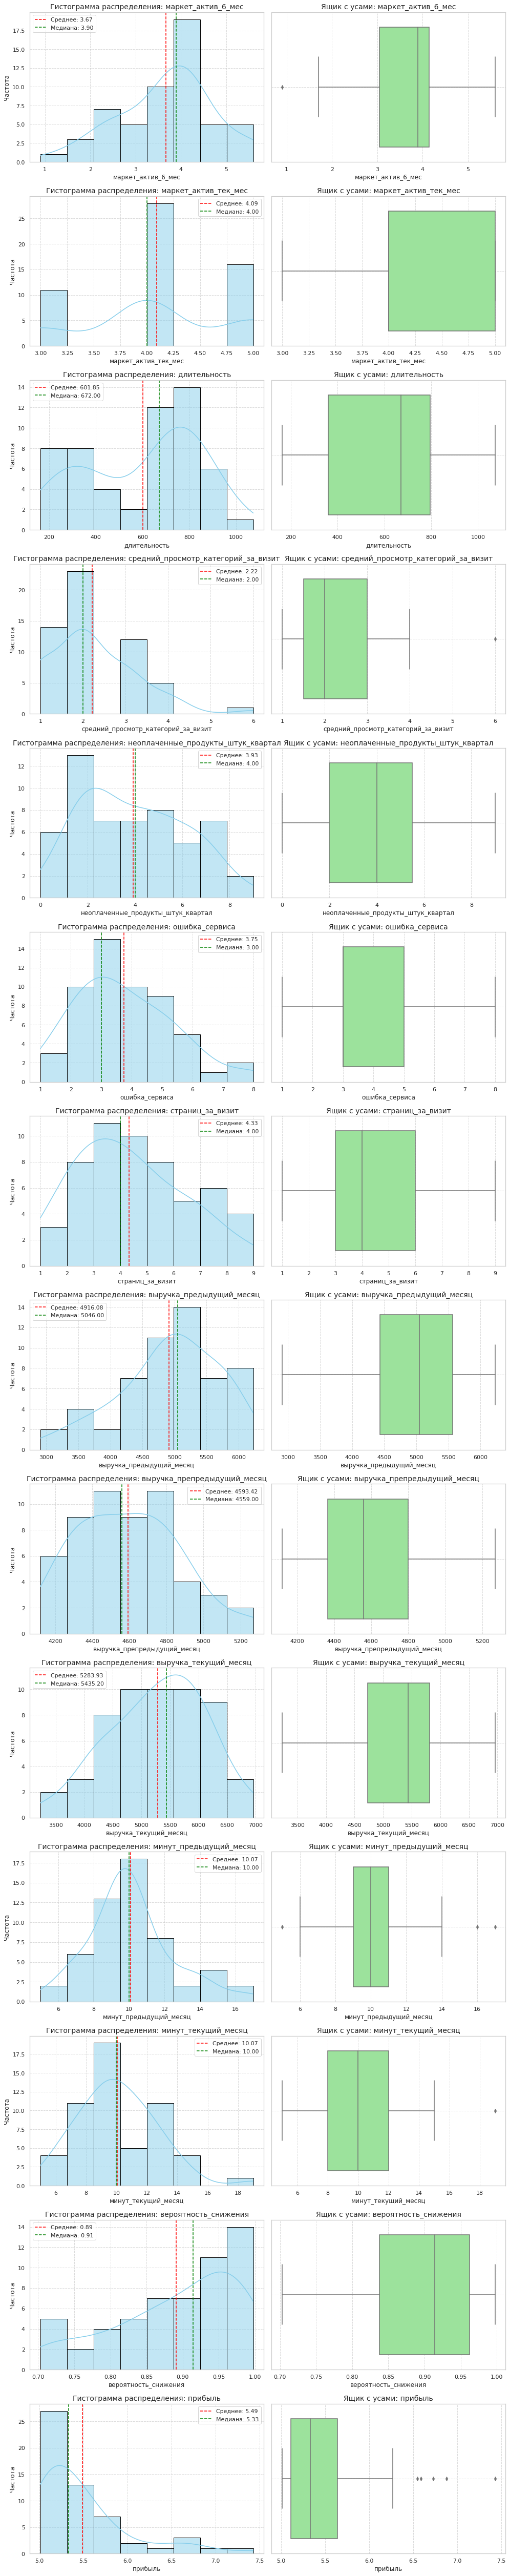

In [74]:
plot_distribution(df_seg_target, columns_to_analyze)

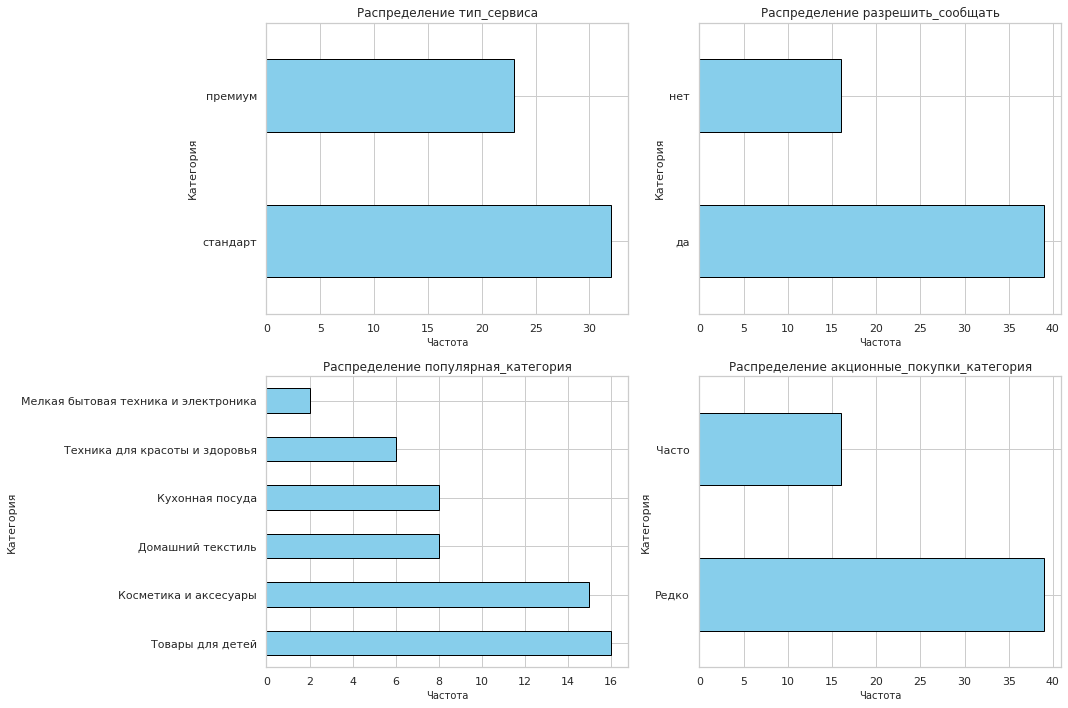

In [75]:
df_seg_target.loc[:, 'акционные_покупки_категория'] = df_seg_target['акционные_покупки_категория'].astype('object')
plot_categorical_features(df_seg_target)


**Рекомендации**

Чтобы повысить эффективность взаимодействия с целевым сегментом:

* **Увеличить количество маркетинговых коммуникаций**: проведенный анализ показал, что среднемесячное количество маркетинговых коммуникаций с целевыми клиентами ниже, чем с клиентами вне сегмента.
* **Персонализировать предложения, учитывая интересы сегмента**: среднее количество просматриваемых категорий за визит составляет всего 2. Это свидетельствует о конкретных интересах и предпочтениях, но также указывает на возможные сложности с поиском нужных товаров. Рекомендую персонализировать предложения для целевого сегмента, чтобы они были более актуальными и интересными. 
* **Расширить ассортимент в ключевых категориях**: таких как "Товары для детей", "Косметика и аксессуары".
* **Улучшить юзабилити сайта, минимизировав число сбоев**

**Поведенческие особенности целевого сегмента**

* **Ограниченный выбор товаров**: среднее количество просматриваемых категорий за визит составляет всего 2, что свидетельствует о конкретных интересах и предпочтениях, но также указывает на возможные сложности с поиском нужных товаров.
* **Низкая глубина просмотра**: среднее количество просмотренных страниц за визит составляет 4, что может указывать на неудовлетворительный пользовательский опыт на сайте. Необходимо изучить число сбоев, которые коснулись покупателя во время посещения сайта, и оптимизировать сайт для улучшения юзабилити.


# Общий вывод

**Задача:** Разработать решение для интернет-магазина «В один клик», которое позволит персонализировать предложения для постоянных клиентов и увеличить их покупательскую активность.

**Что было сделано:**

*Исправление ошибок:*

- Заменена опечатка "стандартт" на "стандарт" в market_file.
- Исправлены опечатки в названии столбца "предыдцщий_месяц" на "предыдущий_месяц" в market_time.

*Объединение данных:*

- market_money и market_time были объединены с market_file по id.

*Преобразование данных:*

- "Покупательская активность" была преобразована в бинарный признак (0/1).
- "Акционные покупки" были сгруппированы в категориальный признак ('Часто', 'Редко').

*Анализ данных:*

- Проведен корреляционный анализ с использованием матрицы Phik.
- Обнаружены сильные корреляции между:
-- 'Покупательская активность' и 'Страниц за визит' (0.75)
-- 'Покупательская активность' и 'Минут предыдущий месяц' (0.69)
-- 'Выручка предыдущий месяц' и 'Выручка текущий месяц' (0.84)

*Поиск оптимальной модели:*

Используя пайплайн с OneHotEncoder, OrdinalEncoder и StandardScaler/MinMaxScaler, был проведен поиск наилучшей модели с помощью RandomizedSearchCV.

**Наилучшей моделью оказалась LogisticRegression с L1-регуляризацией (C=3, solver='liblinear').**
**Результаты модели:**

- **ROC-AUC на тестовой выборке: 0.92**
- **F1-score на тестовой выборке: 0.9**

*Анализ важности признаков:*

*Используя SHAP, были определены наиболее важные признаки:*
- 'Страниц за визит'
- 'Средний просмотр категорий за визит'
- 'Мин предыдущий месяц'
- 'Мин текущий месяц'
- 'Неоплаченный продукты штук квартал'


*Сегментация клиентов:*

Выделен сегмент клиентов с высокой вероятностью снижения покупательской активности и высокой прибыльностью (50 клиентов).

*Выводы и рекомендации:*
*Характеристики целевого сегмента:*

- Низкое среднемесячное количество маркетинговых коммуникаций.
- Среднее количество просматриваемых категорий за визит - 2 (конкретные интересы).
- Среднее количество просмотренных страниц за визит - 4 (необходимость улучшения юзабилити).
- Среднее количество неоплаченных товаров в корзине - 4 (возможность стимулирования покупок).
- Стабильно растущая выручка (высокая покупательская способность).
- Среднее время на сайте - 10 минут (меньше, чем у клиентов вне сегмента).

*Рекомендации:*

- **Увеличение количества маркетинговых коммуникаций.**
- **Персонализация предложений (учитывая интересы сегмента, например, товары для детей и косметика).**
- **Расширение ассортимента в ключевых категориях.**
- **Устранение технических сбоев и оптимизация сайта.**
 
*Дополнительные предложения:*

- Анализ отложенных товаров.
- Программы лояльности.
- Анализ конкурентов.
 